In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import yfinance as yf

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

# Задание №1

Скачаем тикеры всех немецких компаний по [ссылке](https://investexcel.net/stocks-traded-german-exchanges/).

In [2]:
# companies = pd.read_excel("German Traded Companies.xlsx")
# companies = list(companies['Ticker'])

In [3]:
# data = yf.download(companies,'2018-01-02','2018-12-31',threads=False)[['Close', 'Volume']]
# indexes = yf.download(['^GDAXI'],'2018-01-02','2018-12-31')[['Close', 'Volume']]

In [4]:
# prices, volume = data['Close'], data['Volume']
# prices = prices.reset_index()
# indexes = indexes.reset_index()
# volume = volume.reset_index()

# to_delete = set(prices['Date'])-set(indexes['Date'])
# for i in to_delete:
#     prices = prices[prices['Date']!=i]
#     volume = volume[volume['Date']!=i]

# prices = prices.dropna(axis=1, how='any')
# volume = volume.loc[:, prices.columns]

Сохраним данные.

In [5]:
# prices.to_csv('prices.csv')
# volume.to_csv('volume.csv')
# indexes.to_csv('indexes.csv')

# Чтение данных

In [6]:
prices = pd.read_csv('../../ResearchSeminar2024/prices.csv')
volume = pd.read_csv('../../ResearchSeminar2024/volume.csv')
indexes = pd.read_csv('../../ResearchSeminar2024/indexes.csv')

prices.drop(columns=['Unnamed: 0'], inplace=True)
volume.drop(columns=['Unnamed: 0'], inplace=True)
indexes.drop(columns=['Unnamed: 0'], inplace=True)

Просмотрим загруженные данные.

In [7]:
prices

,Date,013A.BE,013A.MU,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02G.MU,...,ZWS.MU,ZYA.DU,ZYA.MU,ZYA.SG,ZYD.BE,ZYY.BE,ZZ7B.SG,ZZG.BE,ZZMS.BE,ZZMS.SG
0,2018-01-02,34.150002,34.459999,35.848000,6.525,49.599998,10.835,13.10,1.514285,1.472142,...,0.963,81.000000,80.680000,80.300003,10.12,55.980000,1.800110,3.38,12.30,12.519
1,2018-01-03,35.700001,36.400002,36.200001,6.900,49.400002,10.740,13.10,1.471428,1.485714,...,0.964,80.000000,79.449997,80.500000,10.10,56.400002,1.861839,3.32,12.40,12.500
2,2018-01-04,36.400002,36.400002,36.200001,6.950,50.500000,10.660,13.30,1.442857,1.457142,...,0.964,81.000000,80.000000,81.500000,10.10,56.200001,1.991272,3.34,12.40,12.700
3,2018-01-05,36.099998,36.400002,38.000000,6.800,52.000000,11.400,13.30,1.421428,1.442857,...,0.964,81.500000,80.500000,81.000000,10.10,57.000000,2.070923,3.40,12.60,12.300
4,2018-01-08,38.200001,38.099998,38.599998,6.800,52.000000,11.600,13.30,1.414285,1.392857,...,0.964,82.000000,81.000000,82.000000,9.98,56.200001,2.090835,3.40,12.40,12.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-19,18.610001,18.629999,17.990000,2.750,37.340000,5.460,13.69,0.832000,0.862000,...,1.110,54.080002,53.759998,53.970001,8.44,48.200001,1.120000,3.72,6.10,6.100
247,2018-12-20,17.500000,17.459999,17.459999,2.570,35.650002,5.240,13.84,0.841000,0.862000,...,1.110,51.790001,51.580002,52.889999,8.24,49.000000,1.170000,3.69,5.70,5.750
248,2018-12-21,17.719999,17.459999,17.309999,2.560,35.480000,5.510,13.52,0.857000,0.862000,...,1.110,52.540001,52.619999,53.380001,8.20,49.400002,1.050000,3.69,5.70,5.700
249,2018-12-27,18.459999,18.430000,18.590000,2.700,34.970001,5.880,14.04,0.848000,0.862000,...,1.110,54.000000,54.430000,53.770000,8.12,49.700001,0.866000,3.69,5.45,5.550


In [8]:
volume

,Date,013A.BE,013A.MU,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02G.MU,...,ZWS.MU,ZYA.DU,ZYA.MU,ZYA.SG,ZYD.BE,ZYY.BE,ZZ7B.SG,ZZG.BE,ZZMS.BE,ZZMS.SG
0,2018-01-02,80.0,46.0,628.0,0.0,0.0,0.0,0.0,7700.0,8209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,0.0,360.0,550.0,0.0,0.0,0.0,0.0,0.0,2660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,2018-01-04,80.0,95.0,560.0,0.0,0.0,0.0,0.0,1400.0,1610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,200.0,200.0,464.0,0.0,0.0,0.0,0.0,0.0,2100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-08,10.0,395.0,2001.0,0.0,0.0,0.0,0.0,0.0,9660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-19,150.0,300.0,610.0,0.0,0.0,0.0,0.0,1400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,2018-12-20,100.0,351.0,10760.0,0.0,0.0,680.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,2018-12-21,260.0,0.0,1211.0,0.0,0.0,190.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
249,2018-12-27,0.0,0.0,11307.0,0.0,0.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1450.0


In [9]:
indexes

,Date,Close,Volume
0,2018-01-02,12871.389648,86049300
1,2018-01-03,12978.209961,84809300
2,2018-01-04,13167.889648,101199400
3,2018-01-05,13319.639648,112555000
4,2018-01-08,13367.780273,95005300
...,...,...,...
246,2018-12-19,10766.209961,96506200
247,2018-12-20,10611.099609,122450600
248,2018-12-21,10633.820312,216162200
249,2018-12-27,10381.509766,104152600


# Задание №2

Вычисление логарифмических доходностей:

In [10]:
returns = {}
for i in prices.drop(columns=['Date']).columns:
    returns[i] = np.log(np.array(prices[i])[1:]/np.array(prices[i])[:-1])
returns = pd.DataFrame(returns)

Удалим акции, у которых содержание нулей в логарифмической доходности превышает 5%.

In [11]:
to_delete = []
for i in returns.columns:
    cur_dict = returns[i].value_counts()
    if 0 in cur_dict and cur_dict[0] > returns.shape[0] * 0.05:
        to_delete.append(i)
returns.drop(columns=to_delete, inplace=True)

Получили следующий набор данных:

In [12]:
returns

,013A.BE,013A.SG,016.BE,01H.DU,01K.SG,01T.DU,02G.BE,02M.BE,02M.MU,02M.SG,...,ZSV.BE,ZSV.DU,ZT1A.SG,ZVA.BE,ZVA.SG,ZVX.BE,ZVX.SG,ZYA.DU,ZYA.MU,ZYA.SG
0,0.044388,0.009771,0.055880,-0.004040,-0.008807,0.000000,-0.028710,0.013377,0.037058,0.006658,...,0.007149,0.006873,0.002987,0.016625,-0.007392,0.015851,0.032383,-0.012423,-0.015363,0.002488
1,0.019418,0.000000,0.007220,0.022023,-0.007477,0.015152,-0.019608,0.000000,0.000455,0.000000,...,-0.020762,-0.020762,0.023122,0.009844,0.052200,0.021733,-0.055525,0.012423,0.006899,0.012346
2,-0.008276,0.048527,-0.021819,0.029270,0.067115,0.000000,-0.014963,0.008969,0.009050,0.009050,...,-0.007018,-0.007018,0.022600,0.000816,-0.014185,-0.034065,-0.009602,0.006154,0.006231,-0.006154
3,0.056543,0.015666,0.000000,0.000000,0.017392,0.000000,-0.005038,-0.018018,0.017858,-0.009050,...,-0.007067,-0.014185,0.005571,0.077656,0.015748,-0.006342,-0.034351,0.006116,0.006192,0.012270
4,0.020726,0.002587,0.043172,0.009569,0.033902,0.007491,-0.020408,0.009050,-0.036040,-0.018349,...,0.000000,0.000000,0.021979,-0.008337,-0.011788,0.001177,0.058890,0.012121,0.012270,0.030032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.011752,-0.041911,0.063812,-0.022770,-0.010929,-0.034461,-0.007186,-0.002612,0.004549,-0.001497,...,0.020559,0.017409,-0.017458,0.002520,0.021411,0.045281,-0.008626,-0.033279,-0.041536,-0.016174
246,-0.061498,-0.029904,-0.067695,-0.046316,-0.041127,0.010897,0.010759,-0.070034,-0.032676,-0.069394,...,-0.030499,-0.034133,-0.081008,-0.056307,-0.125288,-0.033286,-0.017478,-0.043267,-0.041396,-0.020214
247,0.012493,-0.008628,-0.003899,-0.004780,0.050243,-0.023393,0.018846,0.011160,-0.025328,0.005604,...,0.043974,0.004948,0.003342,-0.048424,0.005634,0.011853,-0.003071,0.014378,0.019962,0.009222
248,0.040912,0.071339,0.053245,-0.014479,0.064992,0.037740,-0.010557,0.019624,0.024155,0.003586,...,-0.013475,0.006886,-0.014359,-0.013366,0.009783,-0.047480,-0.018235,0.027409,0.033819,0.007280


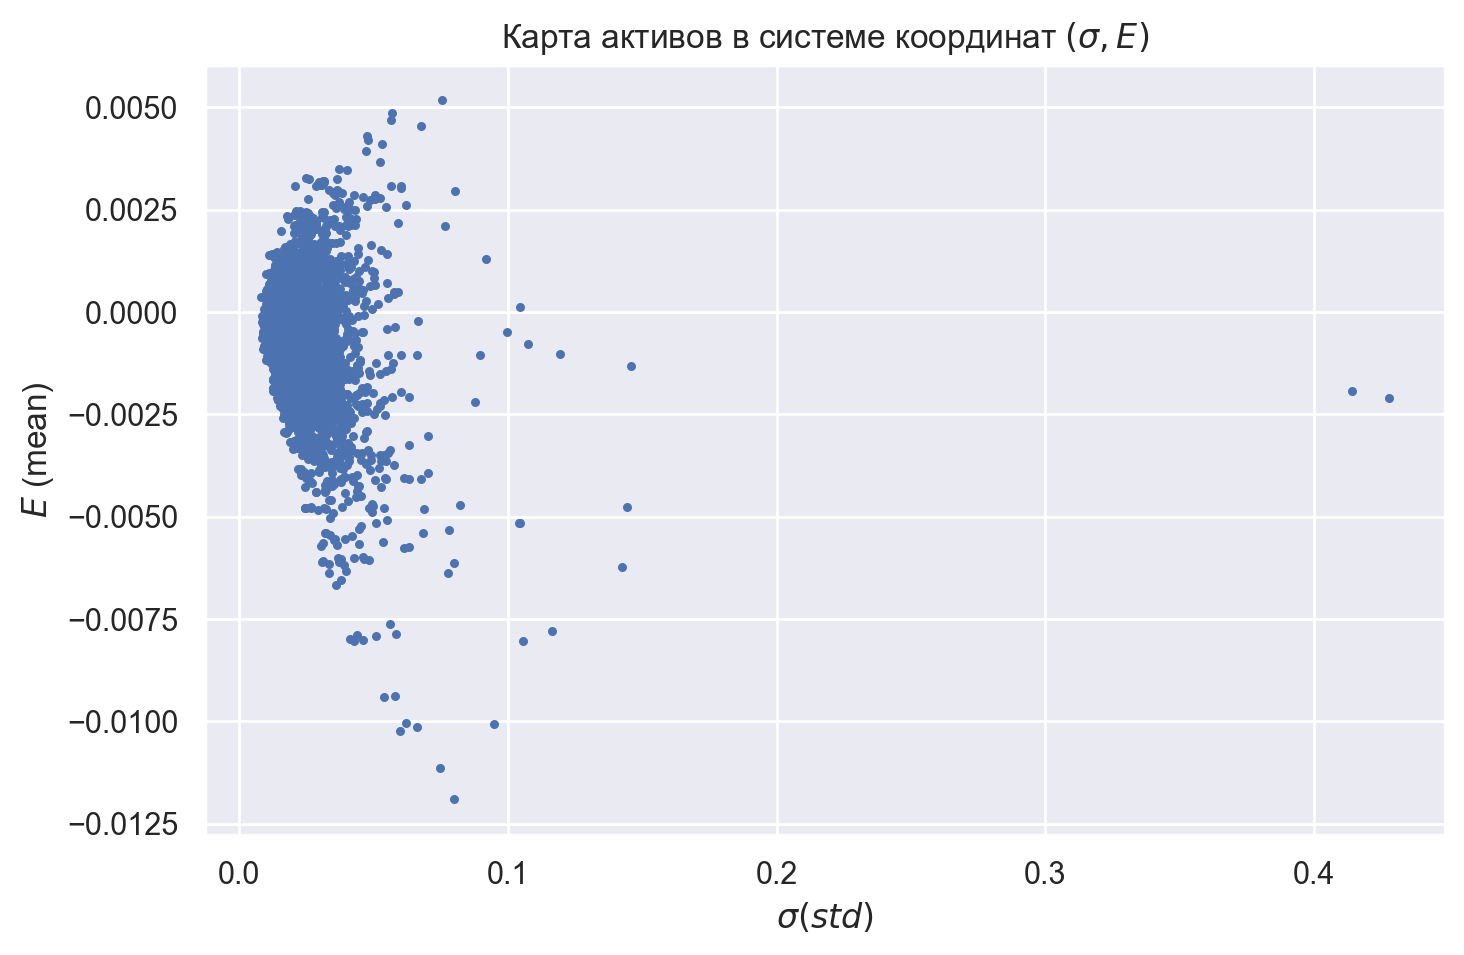

In [13]:
plt.scatter(returns.std(), returns.mean(), s=5)

plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание №3

In [14]:
equal_weights = returns.mean(axis=1)

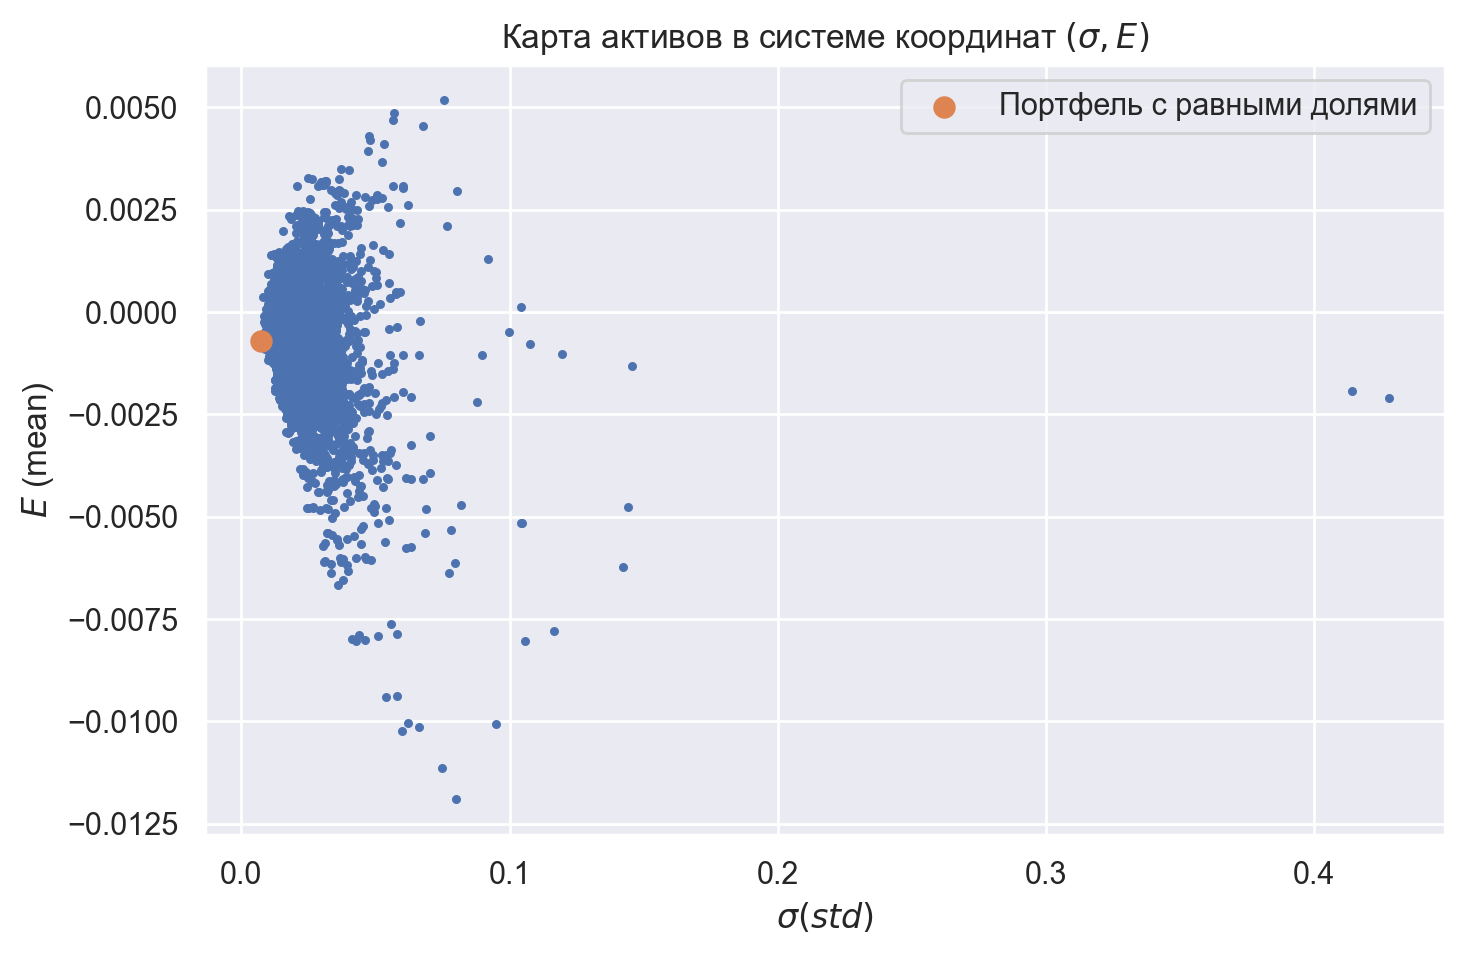

In [15]:
plt.scatter(returns.std(), returns.mean(), s=5)
plt.scatter([np.std(equal_weights)], [np.mean(equal_weights)], s=50, label='Портфель с равными долями')

plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание №4

Рассчитаем логарифмическую доходность для индекса рынка.

In [16]:
indexes_returns = np.log(np.array(indexes['Close'])[1:]/np.array(indexes['Close'])[:-1])

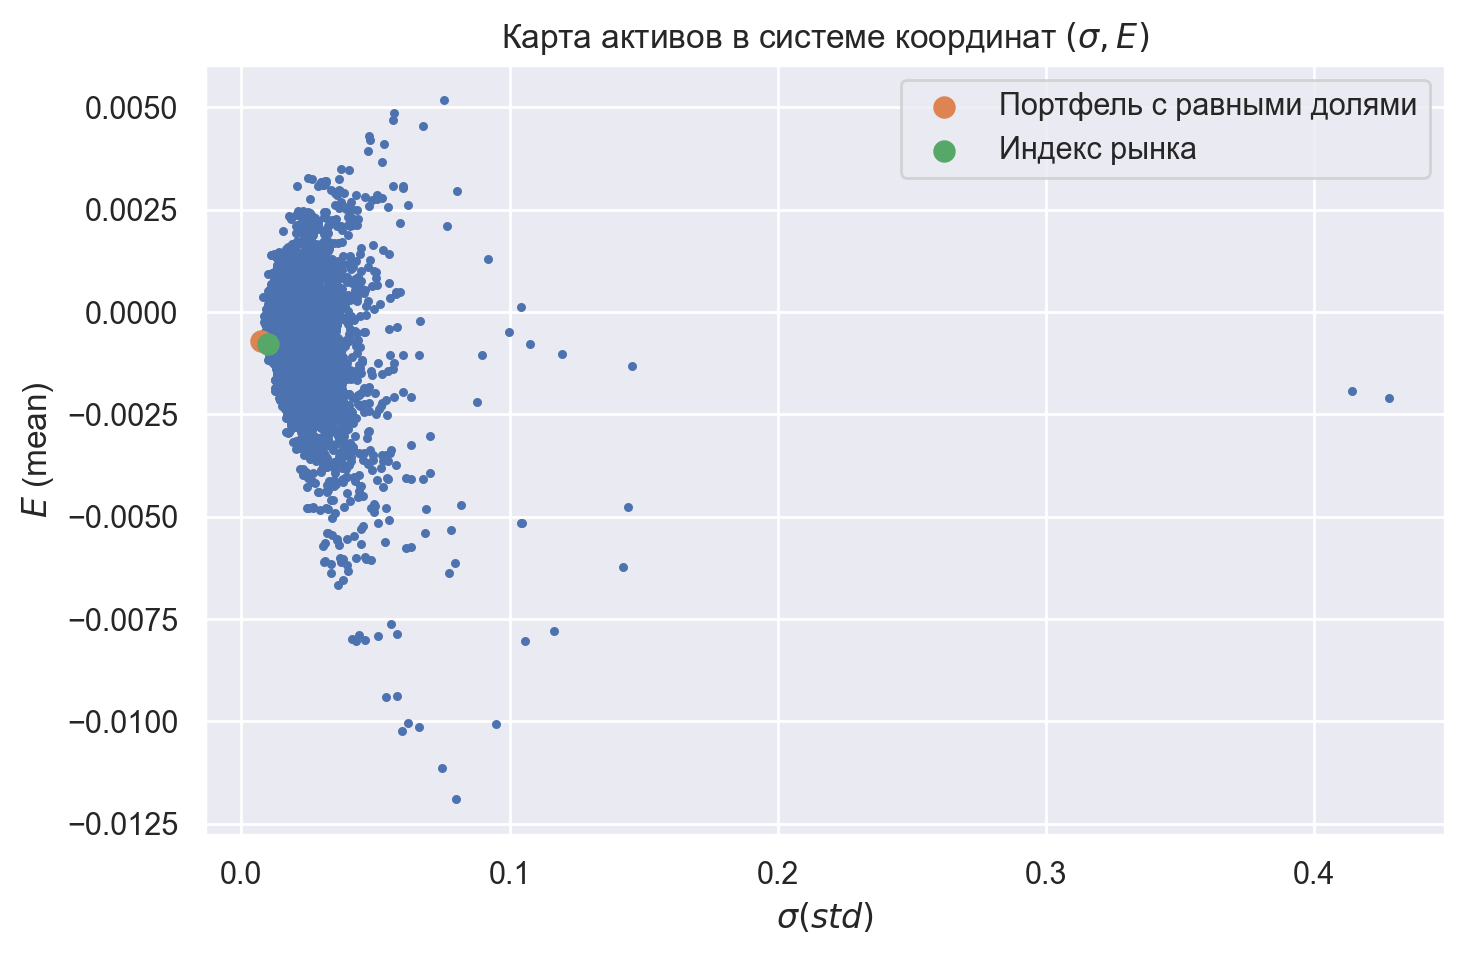

In [17]:
plt.scatter(returns.std(), returns.mean(), s=5)
plt.scatter([np.std(equal_weights)], [np.mean(equal_weights)], s=50, label='Портфель с равными долями')
plt.scatter([np.std(indexes_returns)], [np.mean(indexes_returns)], s=50, label='Индекс рынка')

plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание № 5

In [18]:
def calc_VaR(gamma):
    VaR = []
    for i in returns.columns:
        VaR.append({'Ticker': i, 'VaR': (-returns[i]).quantile(gamma)})
    VaR.sort(key=lambda x: x['VaR'])
    return VaR[0]

Лучший актив по VaR на уровене $\gamma=0.95$:

In [19]:
calc_VaR(0.95)

{'Ticker': 'EFC1.DU', 'VaR': 0.012081280707938164}

Лучший актив по VaR на уровене $\gamma=0.9$:

In [20]:
calc_VaR(0.9)

{'Ticker': '0FM.BE', 'VaR': 0.0086867081855964}

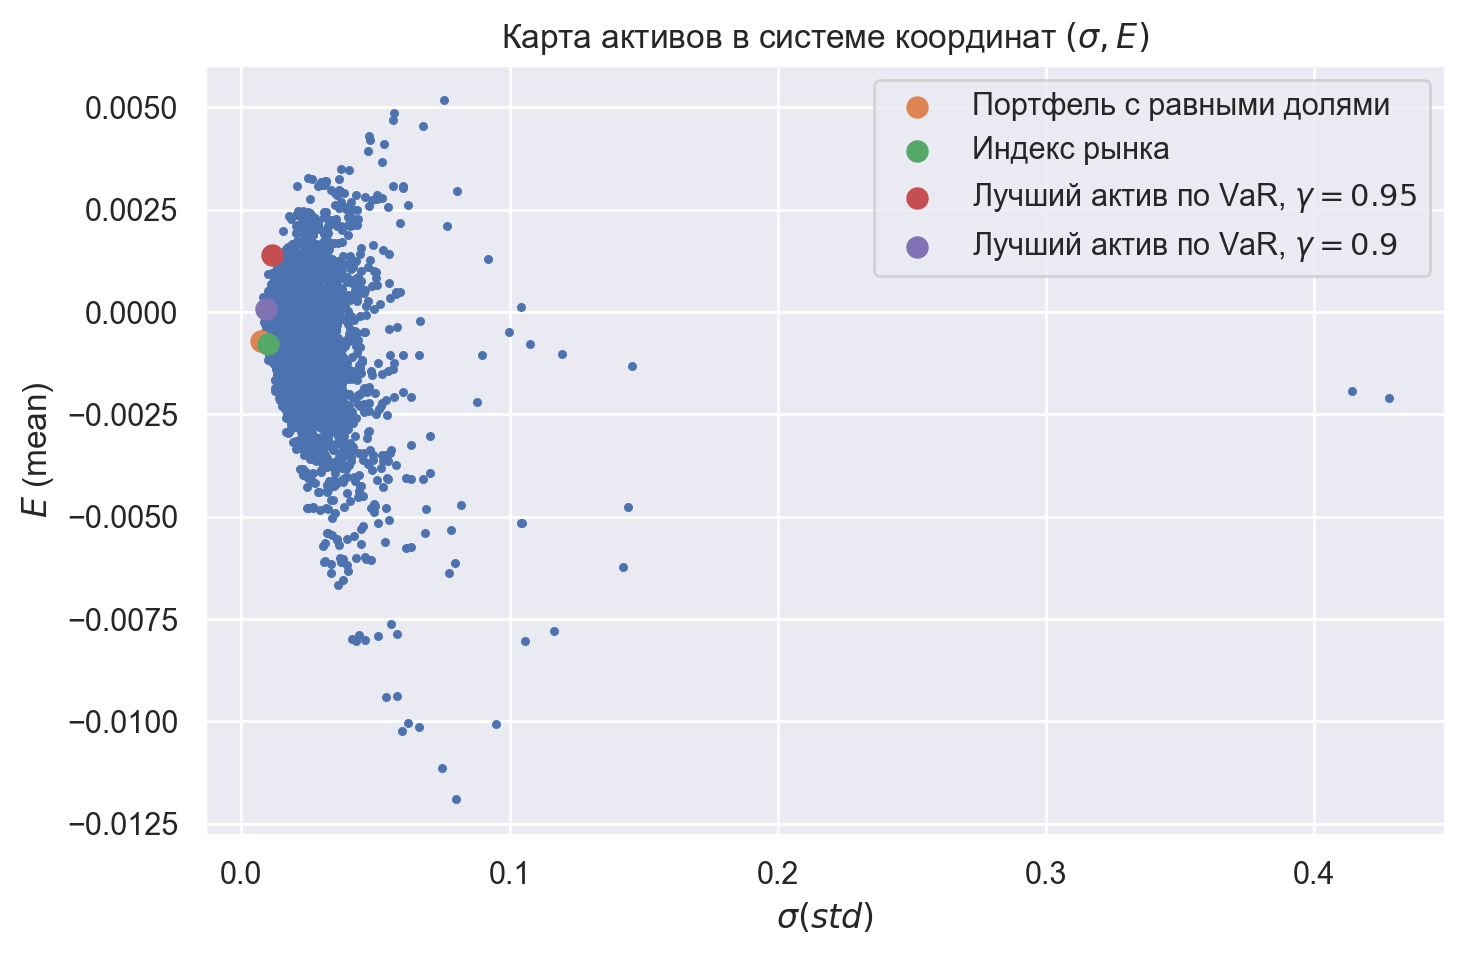

In [21]:
plt.scatter(returns.std(), returns.mean(), s=5)
plt.scatter([np.std(equal_weights)], [np.mean(equal_weights)], s=50, label='Портфель с равными долями')
plt.scatter([np.std(indexes_returns)], [np.mean(indexes_returns)], s=50, label='Индекс рынка')
plt.scatter([np.std(returns['EFC1.DU'])], [np.mean(returns['EFC1.DU'])], s=50, label='Лучший актив по VaR, $\gamma=0.95$')
plt.scatter([np.std(returns['0FM.BE'])], [np.mean(returns['0FM.BE'])], s=50, label='Лучший актив по VaR, $\gamma=0.9$')

plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание № 6

## Критерий инверсии

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [23]:
stocks = ['ADS.DE', 'ALV.DE', 'BAYN.DE', 'BAS.DE', 'BMW.DE', 'CON.DE',
       'COP.DE', 'DB1.DE', 'DBK.DU', 'DTE.DE', 'HEN3.DE', 'MUV2.DE',
       'EOAN.DE', 'RWE.SG', 'SAP.DE', 'SIE.MU', 'TLX.HA', 'TUI1.DE']

In [24]:
def inversion_criterion(sample, events, alpha):
    inversion = 0

    for i in range(events - 1):
        for j in range(i + 1, events):
            if sample[i] > sample[j]:
                inversion += 1

    Et = events * (events - 1) / 4
    Dt = events * (events - 1) * (2 * events + 5) / 72

    T_norm = np.abs((inversion - Et) / np.sqrt(Dt))
    C = norm.ppf(1 - alpha/2)

    if T_norm < C:
        return 'Гипотеза не отвергается', T_norm

    return 'Гипотеза отвергается', T_norm

In [25]:
crit_table = pd.DataFrame()
pv_table = pd.DataFrame()
alpha = 0.05

for stock in stocks:
    res, pv = inversion_criterion(returns[stock], returns[stock].shape[0], alpha)
    crit_table.loc[stock, 'Критерий инверсии'] = res
    pv_table.loc[stock, 'Критерий инверсии'] = pv
    
crit_table

,Критерий инверсии
ADS.DE,Гипотеза не отвергается
ALV.DE,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается


In [26]:
crit_table_volume = pd.DataFrame()
pv_table_volume = pd.DataFrame()

for stock in stocks:
    res, pv = inversion_criterion(volume[stock], volume[stock].shape[0], alpha)
    crit_table_volume.loc[stock, 'Критерий инверсии'] = res
    pv_table_volume.loc[stock, 'Критерий инверсии'] = pv
    
crit_table_volume

,Критерий инверсии
ADS.DE,Гипотеза отвергается
ALV.DE,Гипотеза отвергается
BAYN.DE,Гипотеза отвергается
BAS.DE,Гипотеза отвергается
BMW.DE,Гипотеза не отвергается
CON.DE,Гипотеза отвергается
COP.DE,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается
DTE.DE,Гипотеза отвергается


## Критерий независимости

In [27]:
from scipy.stats import kendalltau

In [28]:
def ind_test(sample, k, alpha):
    sample_k1 = sample[:250-k]
    sample_k2 = sample[k-250:]
    
    p_value = kendalltau(sample_k1, sample_k2).pvalue
    
    if p_value > alpha:
        return 'Гипотеза не отвергается', p_value

    return 'Гипотеза отвергается', p_value

In [29]:
ind_table = pd.DataFrame(index=stocks, columns=range(1, 11))
ind_pv_table = pd.DataFrame(index=stocks, columns=range(1, 11))

res_k = []
res_pv = []

for stock in stocks:
    res_k = []
    res_pv = []
    for k in range(1, 11):
        res, pv = ind_test(returns[stock], k, alpha)
        res_k.append(res)
        res_pv.append(pv)
        
    ind_table.loc[stock,] = res_k
    ind_pv_table.loc[stock,] = res_pv
    
ind_table

,1,2,3,4,5,6,7,8,9,10
ADS.DE,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза отвергается


In [30]:
ind_pv_table

,1,2,3,4,5,6,7,8,9,10
ADS.DE,0.009066,0.907328,0.377659,0.859101,0.704654,0.997496,0.840435,0.509134,0.917232,0.021057
ALV.DE,0.095184,0.19769,0.316142,0.265967,0.584027,0.984974,0.373554,0.925943,0.126009,0.228839
BAYN.DE,0.723924,0.056923,0.168075,0.207225,0.844186,0.057975,0.01989,0.066362,0.197532,0.271863
BAS.DE,0.32013,0.06975,0.523995,0.980828,0.932872,0.335228,0.807251,0.518353,0.66482,0.129252
BMW.DE,0.261828,0.75818,0.972341,0.098866,0.248379,0.779968,0.897597,0.151578,0.529795,0.910337
CON.DE,0.09074,0.58661,0.75266,0.035593,0.449327,0.326639,0.507687,0.313377,0.649789,0.455384
COP.DE,0.353814,0.293368,0.429213,0.902518,0.367678,0.269543,0.569702,0.012723,0.930565,0.773984
DB1.DE,0.127493,0.301888,0.795123,0.498559,0.568051,0.030803,0.862716,0.673124,0.008378,0.90396
DBK.DU,0.978137,0.181166,0.999385,0.364832,0.390074,0.652401,0.367648,0.418203,0.05169,0.505395
DTE.DE,0.341319,0.502294,0.383518,0.751203,0.522469,0.62882,0.415624,0.427396,0.380091,0.033572


In [31]:
(ind_table == 'Гипотеза не отвергается').sum(axis=1)

ADS.DE      8
ALV.DE     10
BAYN.DE     9
BAS.DE     10
BMW.DE     10
CON.DE      9
COP.DE      9
DB1.DE      8
DBK.DU     10
DTE.DE      9
HEN3.DE    10
MUV2.DE    10
EOAN.DE    10
RWE.SG     10
SAP.DE     10
SIE.MU     10
TLX.HA      9
TUI1.DE     8
dtype: int64

In [32]:
k = 5

for stock in stocks:
    res, pv = ind_test(returns[stock], k, alpha)
    crit_table.loc[stock, 'Критерий независимости'] = res
    pv_table.loc[stock, 'Критерий независимости'] = pv
    
crit_table

,Критерий инверсии,Критерий независимости
ADS.DE,Гипотеза не отвергается,Гипотеза не отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается


In [33]:
k = 5

for stock in stocks:
    res, pv = ind_test(volume[stock], k, alpha)
    crit_table_volume.loc[stock, 'Критерий независимости'] = res
    pv_table_volume.loc[stock, 'Критерий независимости'] = pv
    
crit_table_volume

,Критерий инверсии,Критерий независимости
ADS.DE,Гипотеза отвергается,Гипотеза отвергается
ALV.DE,Гипотеза отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза отвергается,Гипотеза отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза отвергается,Гипотеза отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза отвергается,Гипотеза отвергается


## Критерий автокорреляции

### Критерий Льюнга-Бокса

Минус, придется долго описывать че за модель

http://www.machinelearning.ru/wiki/index.php?title=Критерий_Льюнга-Бокса

https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting

https://www.codecamp.ru/blog/ljung-box-test-python/

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima
from scipy.stats import chi2

In [36]:
def ljungbox(sample, k, alpha, order):
    
    model = ARIMA(sample, order=order)
    model_fit = model.fit()
    
    lb = acorr_ljungbox(model_fit.resid, 
                             lags=[k])
    
    stat = lb.lb_stat.values[0]
    p_value = lb.lb_pvalue.values[0]
    
    if stat <= chi2.ppf(1-alpha, k):
        return 'Гипотеза не отвергается', p_value

    return 'Гипотеза отвергается', p_value

In [37]:
k = 5

for stock in stocks:
    order = auto_arima(returns[stock]).get_params()['order']
    res, pv = ljungbox(returns[stock], k, alpha, order)
    crit_table.loc[stock, 'Критерий Льюнга-Бокса'] = res
    pv_table.loc[stock, 'Критерий Льюнга-Бокса'] = pv
    
crit_table

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса
ADS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается


In [38]:
k = 5

for stock in stocks:
    order = auto_arima(volume[stock]).get_params()['order']
    res, pv = ljungbox(volume[stock], k, alpha, order)
    crit_table_volume.loc[stock, 'Критерий Льюнга-Бокса'] = res
    pv_table_volume.loc[stock, 'Критерий Льюнга-Бокса'] = pv
    
crit_table_volume

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса
ADS.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается
ALV.DE,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается


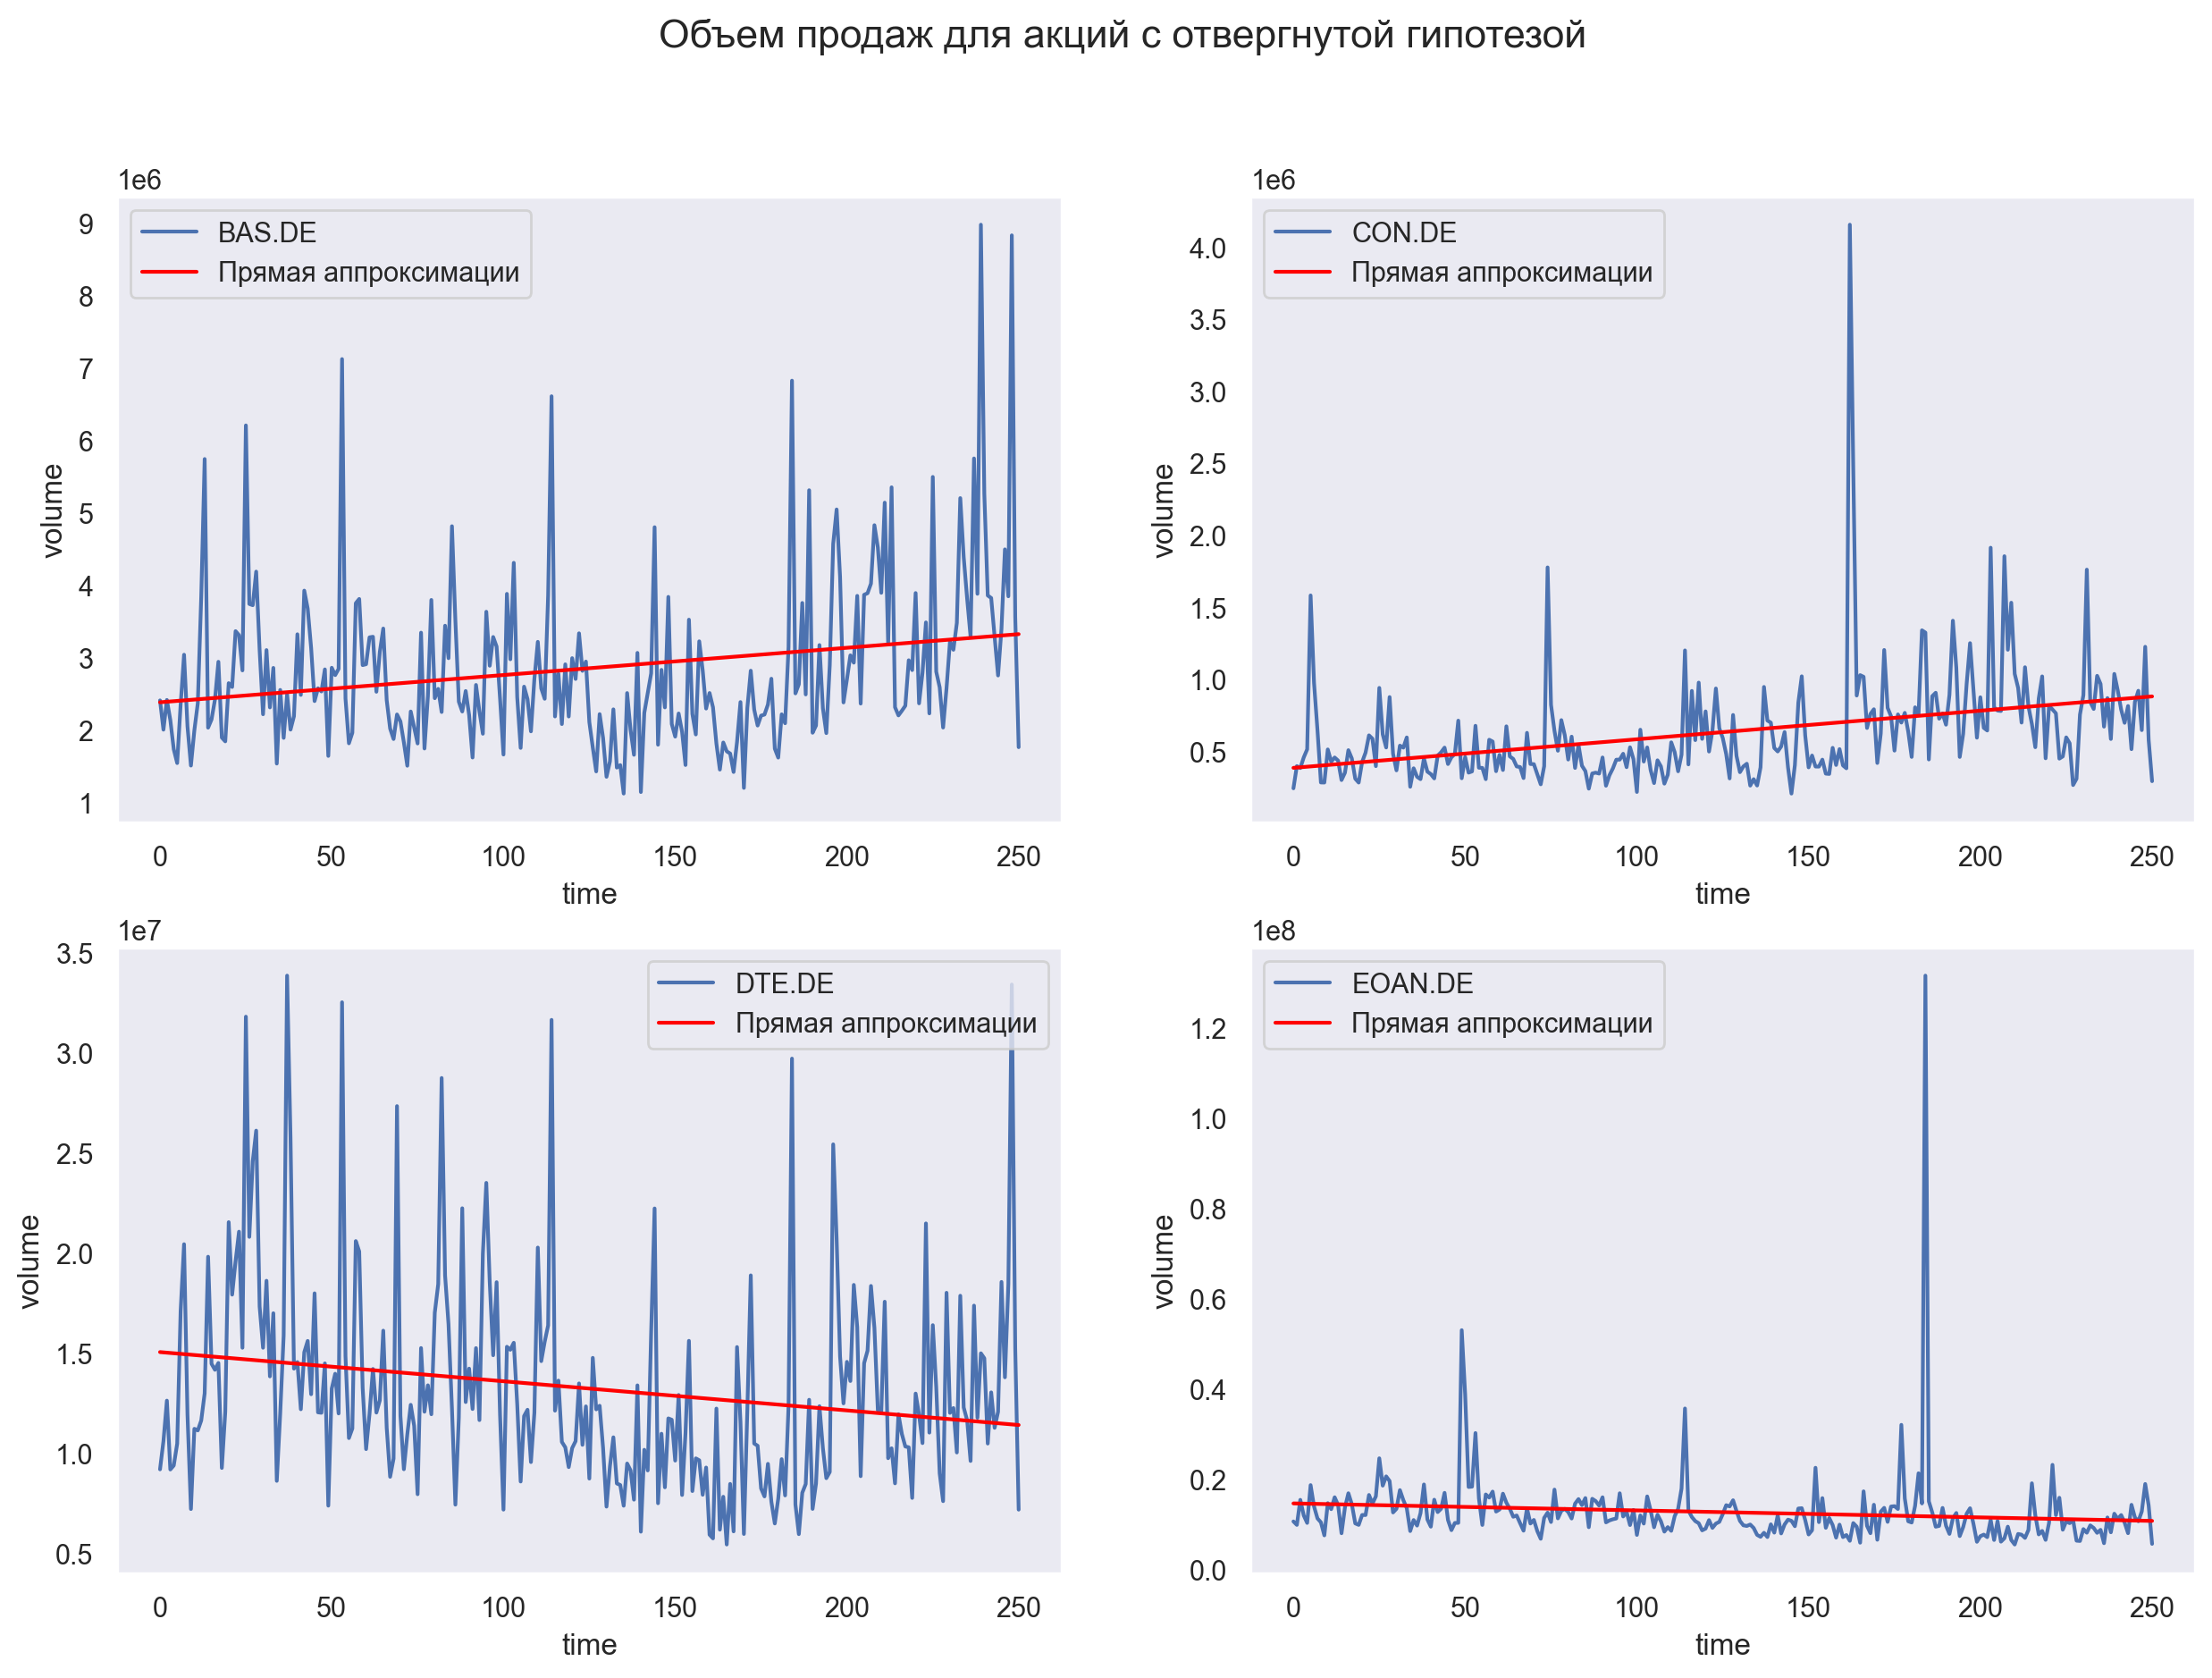

In [39]:
plt.rcParams['figure.figsize'] = 15, 10

rjg = (crit_table_volume=='Гипотеза отвергается').sum(axis=1)
indx_rjg = rjg[rjg>=2].index

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axes = [ax1, ax2, ax3, ax4]
plt.suptitle('Объем продаж для акций с отвергнутой гипотезой', fontsize=16)

for axes, stock in zip(axes, indx_rjg[1:5]):
    ticker = volume[stock].to_list()
    periods = volume.index.to_list()
    
    axes.grid()
    axes.set_xlabel("time")
    axes.set_ylabel("volume")

    axes.plot(periods, ticker, label=stock)
    
    coefficients = np.polyfit(np.arange(251), volume[stock].to_list(), 1)
    polynomial = np.poly1d(coefficients)
    axes.plot(np.arange(251), polynomial(np.arange(251)), color='red', label='Прямая аппроксимации')
    
    axes.legend();
fig.show()

In [40]:
crit_table_volume

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса
ADS.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается
ALV.DE,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза не отвергается


In [41]:
pv_table_volume

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса
ADS.DE,3.856459,3.605403e-04,0.627648
ALV.DE,2.965871,5.388289e-01,0.535160
BAYN.DE,3.566115,3.849335e-01,0.990897
BAS.DE,3.158430,3.866397e-03,0.807989
BMW.DE,0.143668,7.420570e-01,0.425240
CON.DE,7.874638,6.337636e-07,0.933861
COP.DE,1.115492,2.086638e-01,0.526976
DB1.DE,1.371236,1.037511e-01,0.541220
DBK.DU,0.309149,2.470813e-01,0.892804
DTE.DE,3.496914,4.512757e-04,0.994609


In [42]:
crit_table

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса
ADS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
ALV.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAYN.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BAS.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
BMW.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
CON.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
COP.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DB1.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DBK.DU,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается
DTE.DE,Гипотеза не отвергается,Гипотеза не отвергается,Гипотеза не отвергается


In [43]:
pv_table

,Критерий инверсии,Критерий независимости,Критерий Льюнга-Бокса
ADS.DE,0.943599,0.704654,0.793328
ALV.DE,0.380618,0.584027,0.530985
BAYN.DE,0.221712,0.844186,0.976551
BAS.DE,1.350701,0.932872,0.447951
BMW.DE,1.060130,0.248379,0.284385
CON.DE,1.412750,0.449327,0.475740
COP.DE,0.724157,0.367678,0.711908
DB1.DE,1.521714,0.568051,0.243047
DBK.DU,0.194471,0.390074,0.972436
DTE.DE,1.446044,0.522469,0.403473


# Задание № 7

промышленность (автомобильная, химическая, тяжелая, текстильная и тд):
- CON.DE - Континенталь
- SIE.MU - Сименс
- BMW.DE - БМВ
- ADS.DE - адидас
- HEN3.DE - Хенкел
- BAYN.DE - Баер
- BAS.DE - хима с 40млрд евро оборота

информационные технологии:
- SAP.DE - САП ИТ компания
- DTE.DE - Первый канал
- COP.DE - ПО для больниц

банки  финансы страхование
- ALV.DE - страховая
- MUV2.DE - страховая
- DB1.DE - финансы
- DBK.DU - банк 
- TLX.HA - страховая

энергетика
- SIE.MU
- EOAN.DE 
- RWE.SG
- MUV2.DE


Тест Шапиро-Уилка + Тест Колмогорова-Смирнова + тест Д'Агостино и Пирсона

In [44]:
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest

In [45]:
energy = ['MUV2.DE', 'EOAN.DE', 'RWE.SG', 'SIE.MU']
finance = ['ALV.DE', 'DB1.DE', 'DBK.DU', 'TLX.HA']
it = ['SAP.DE', 'DTE.DE', 'COP.DE']
industry = ['BAS.DE', 'BAYN.DE', 'BMW.DE', 'ADS.DE' ]

all_stocks = [energy, finance, it, industry]
names = ['energy', 'finance', 'it', 'industry']

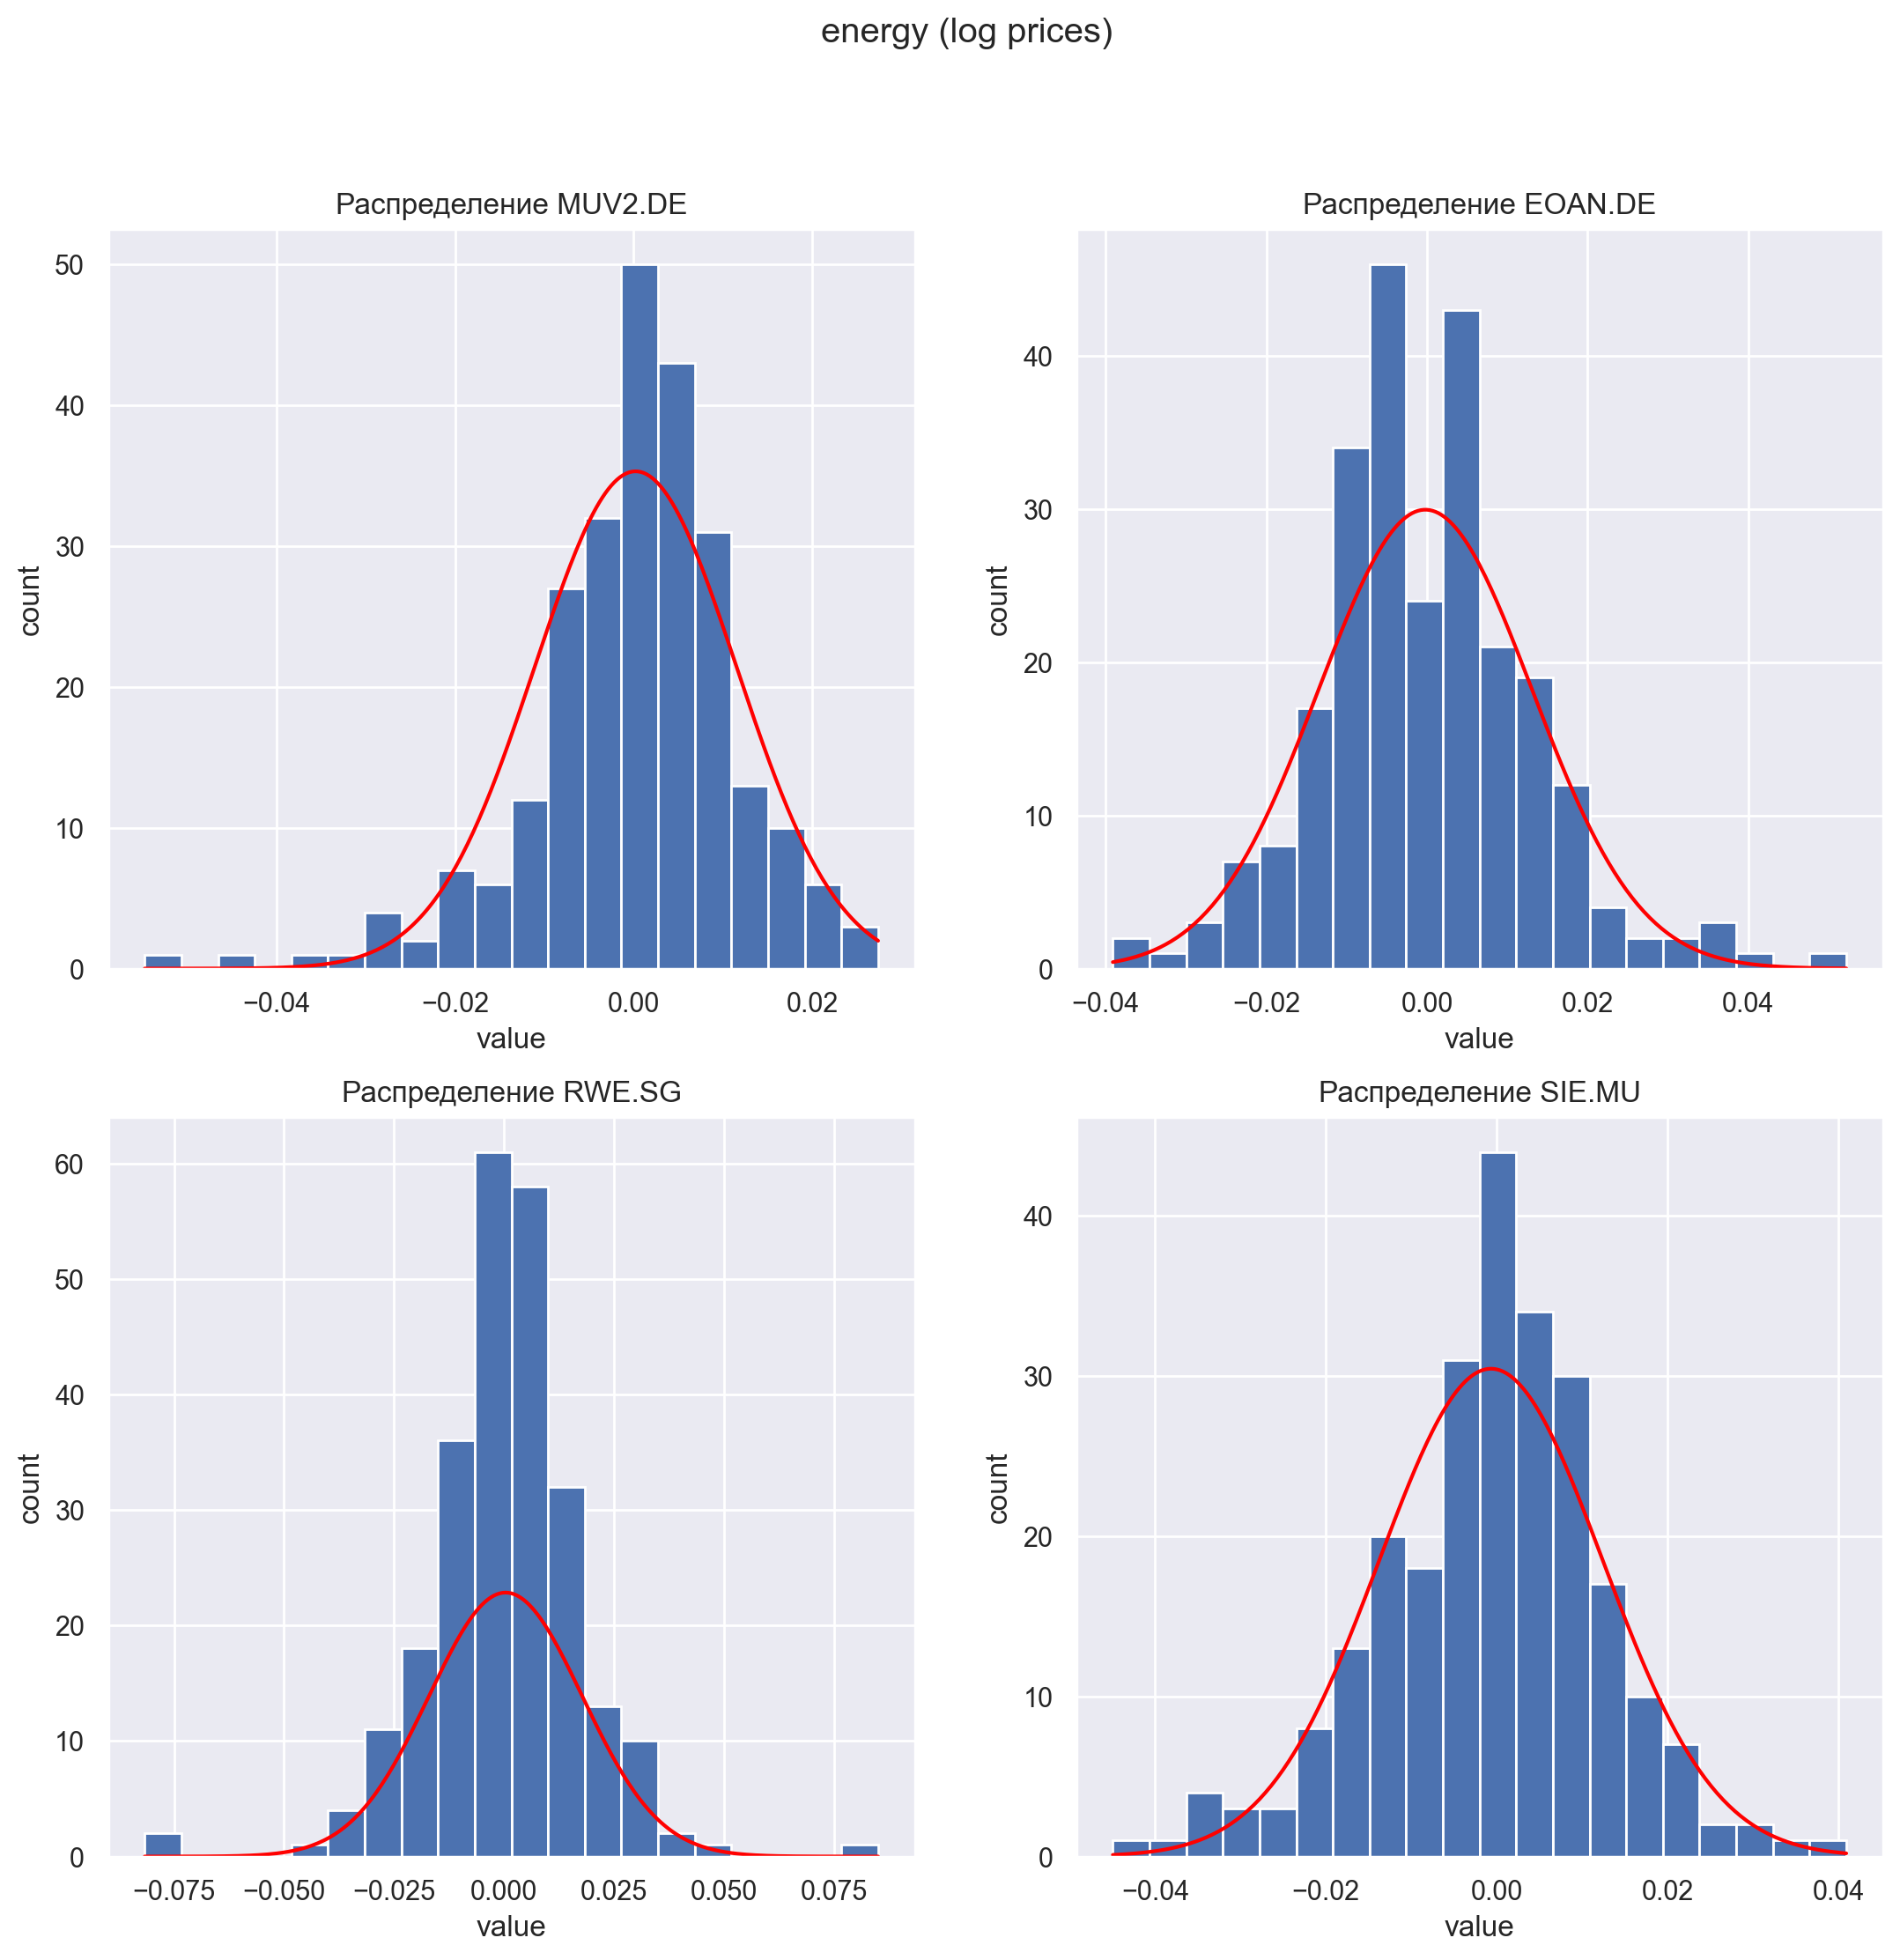

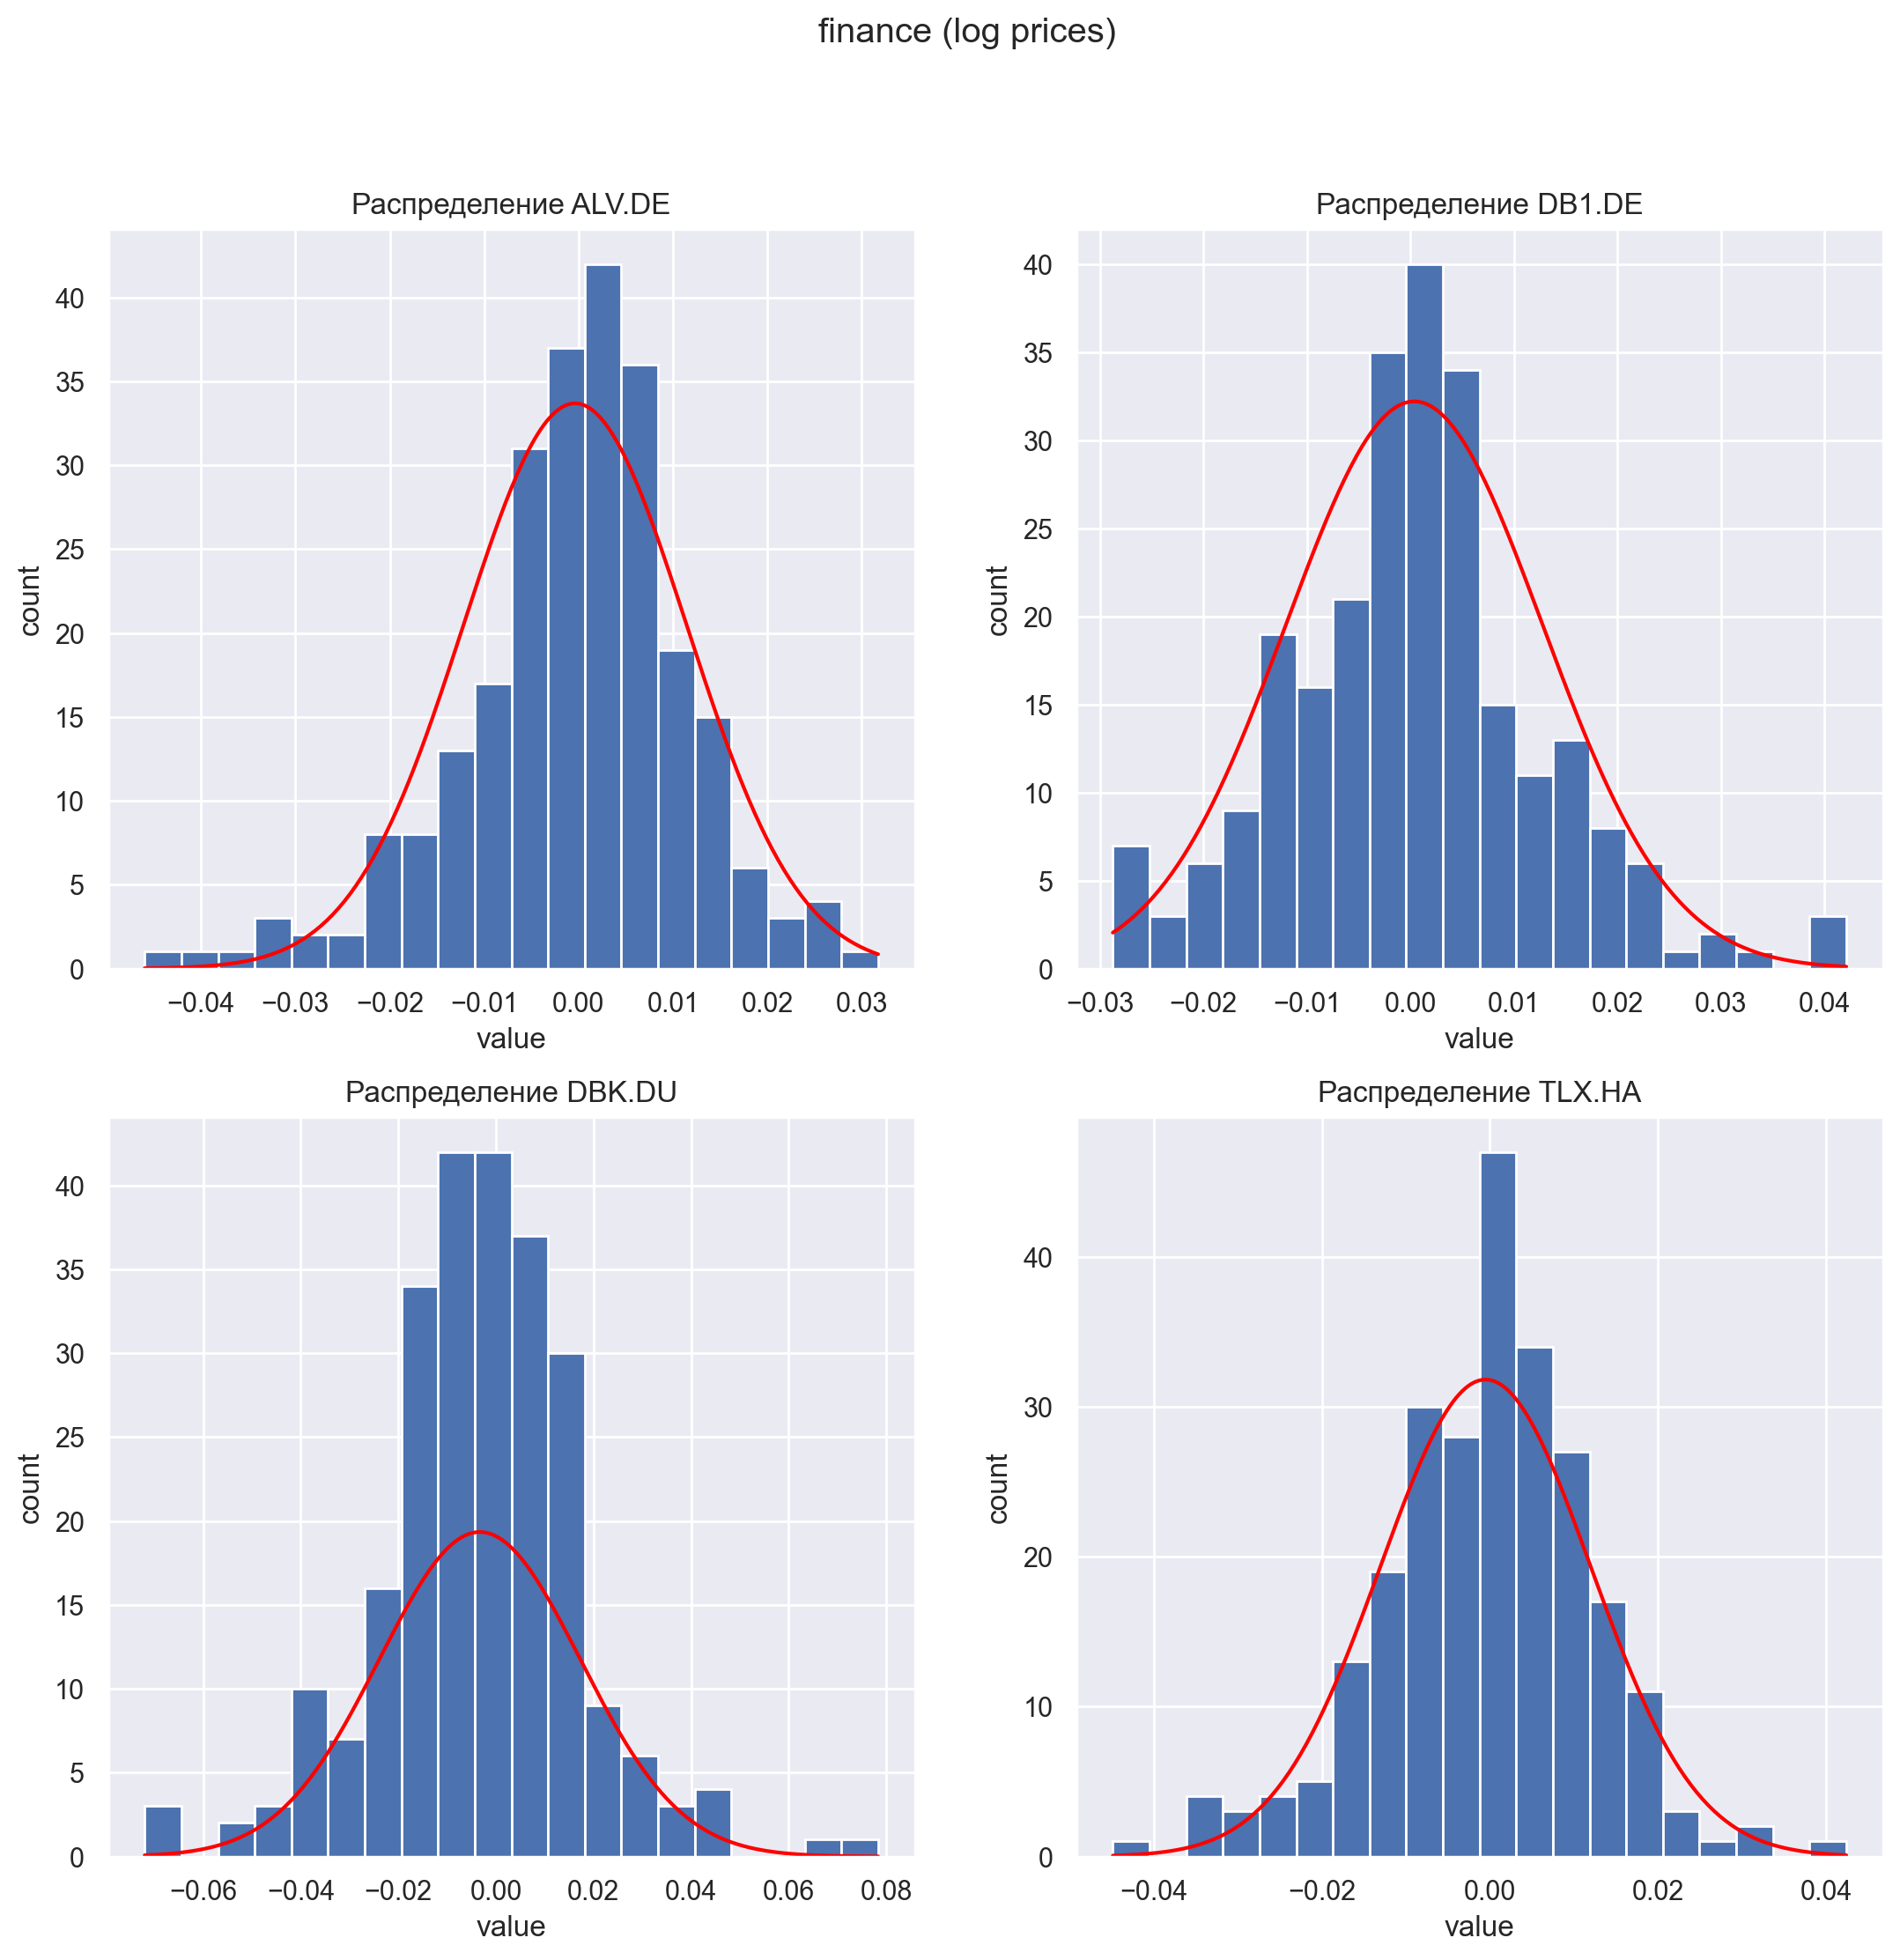

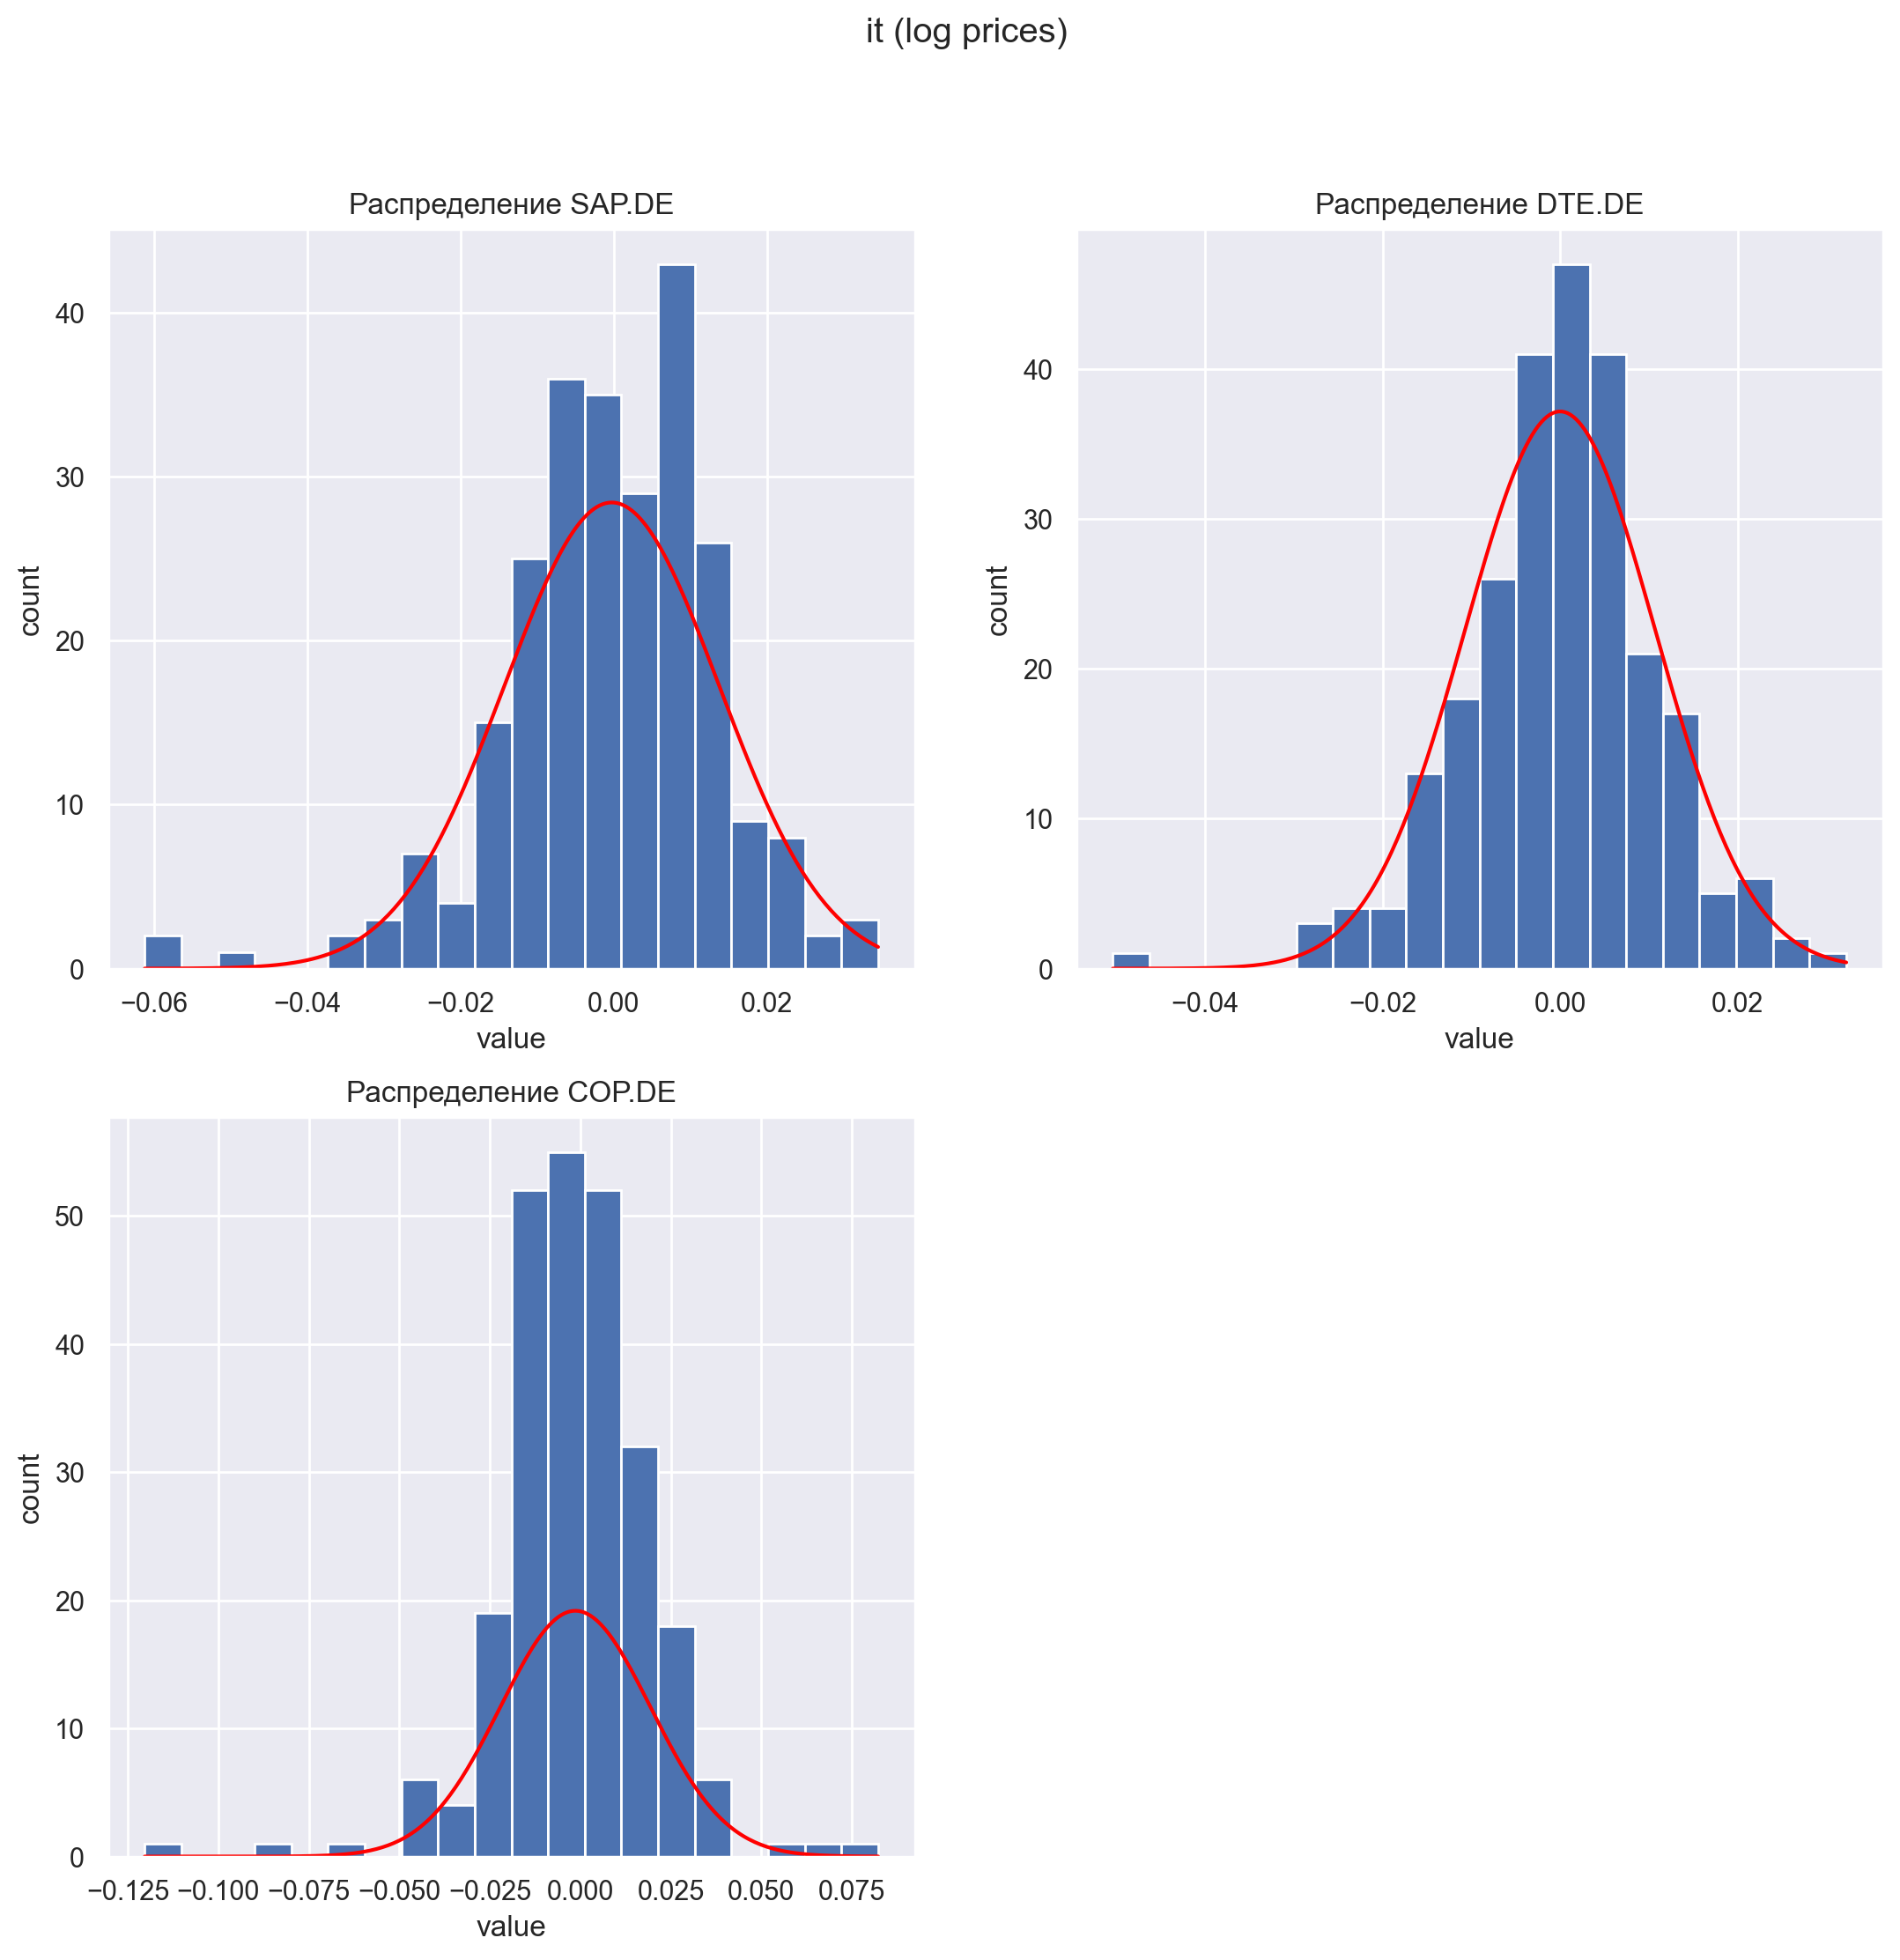

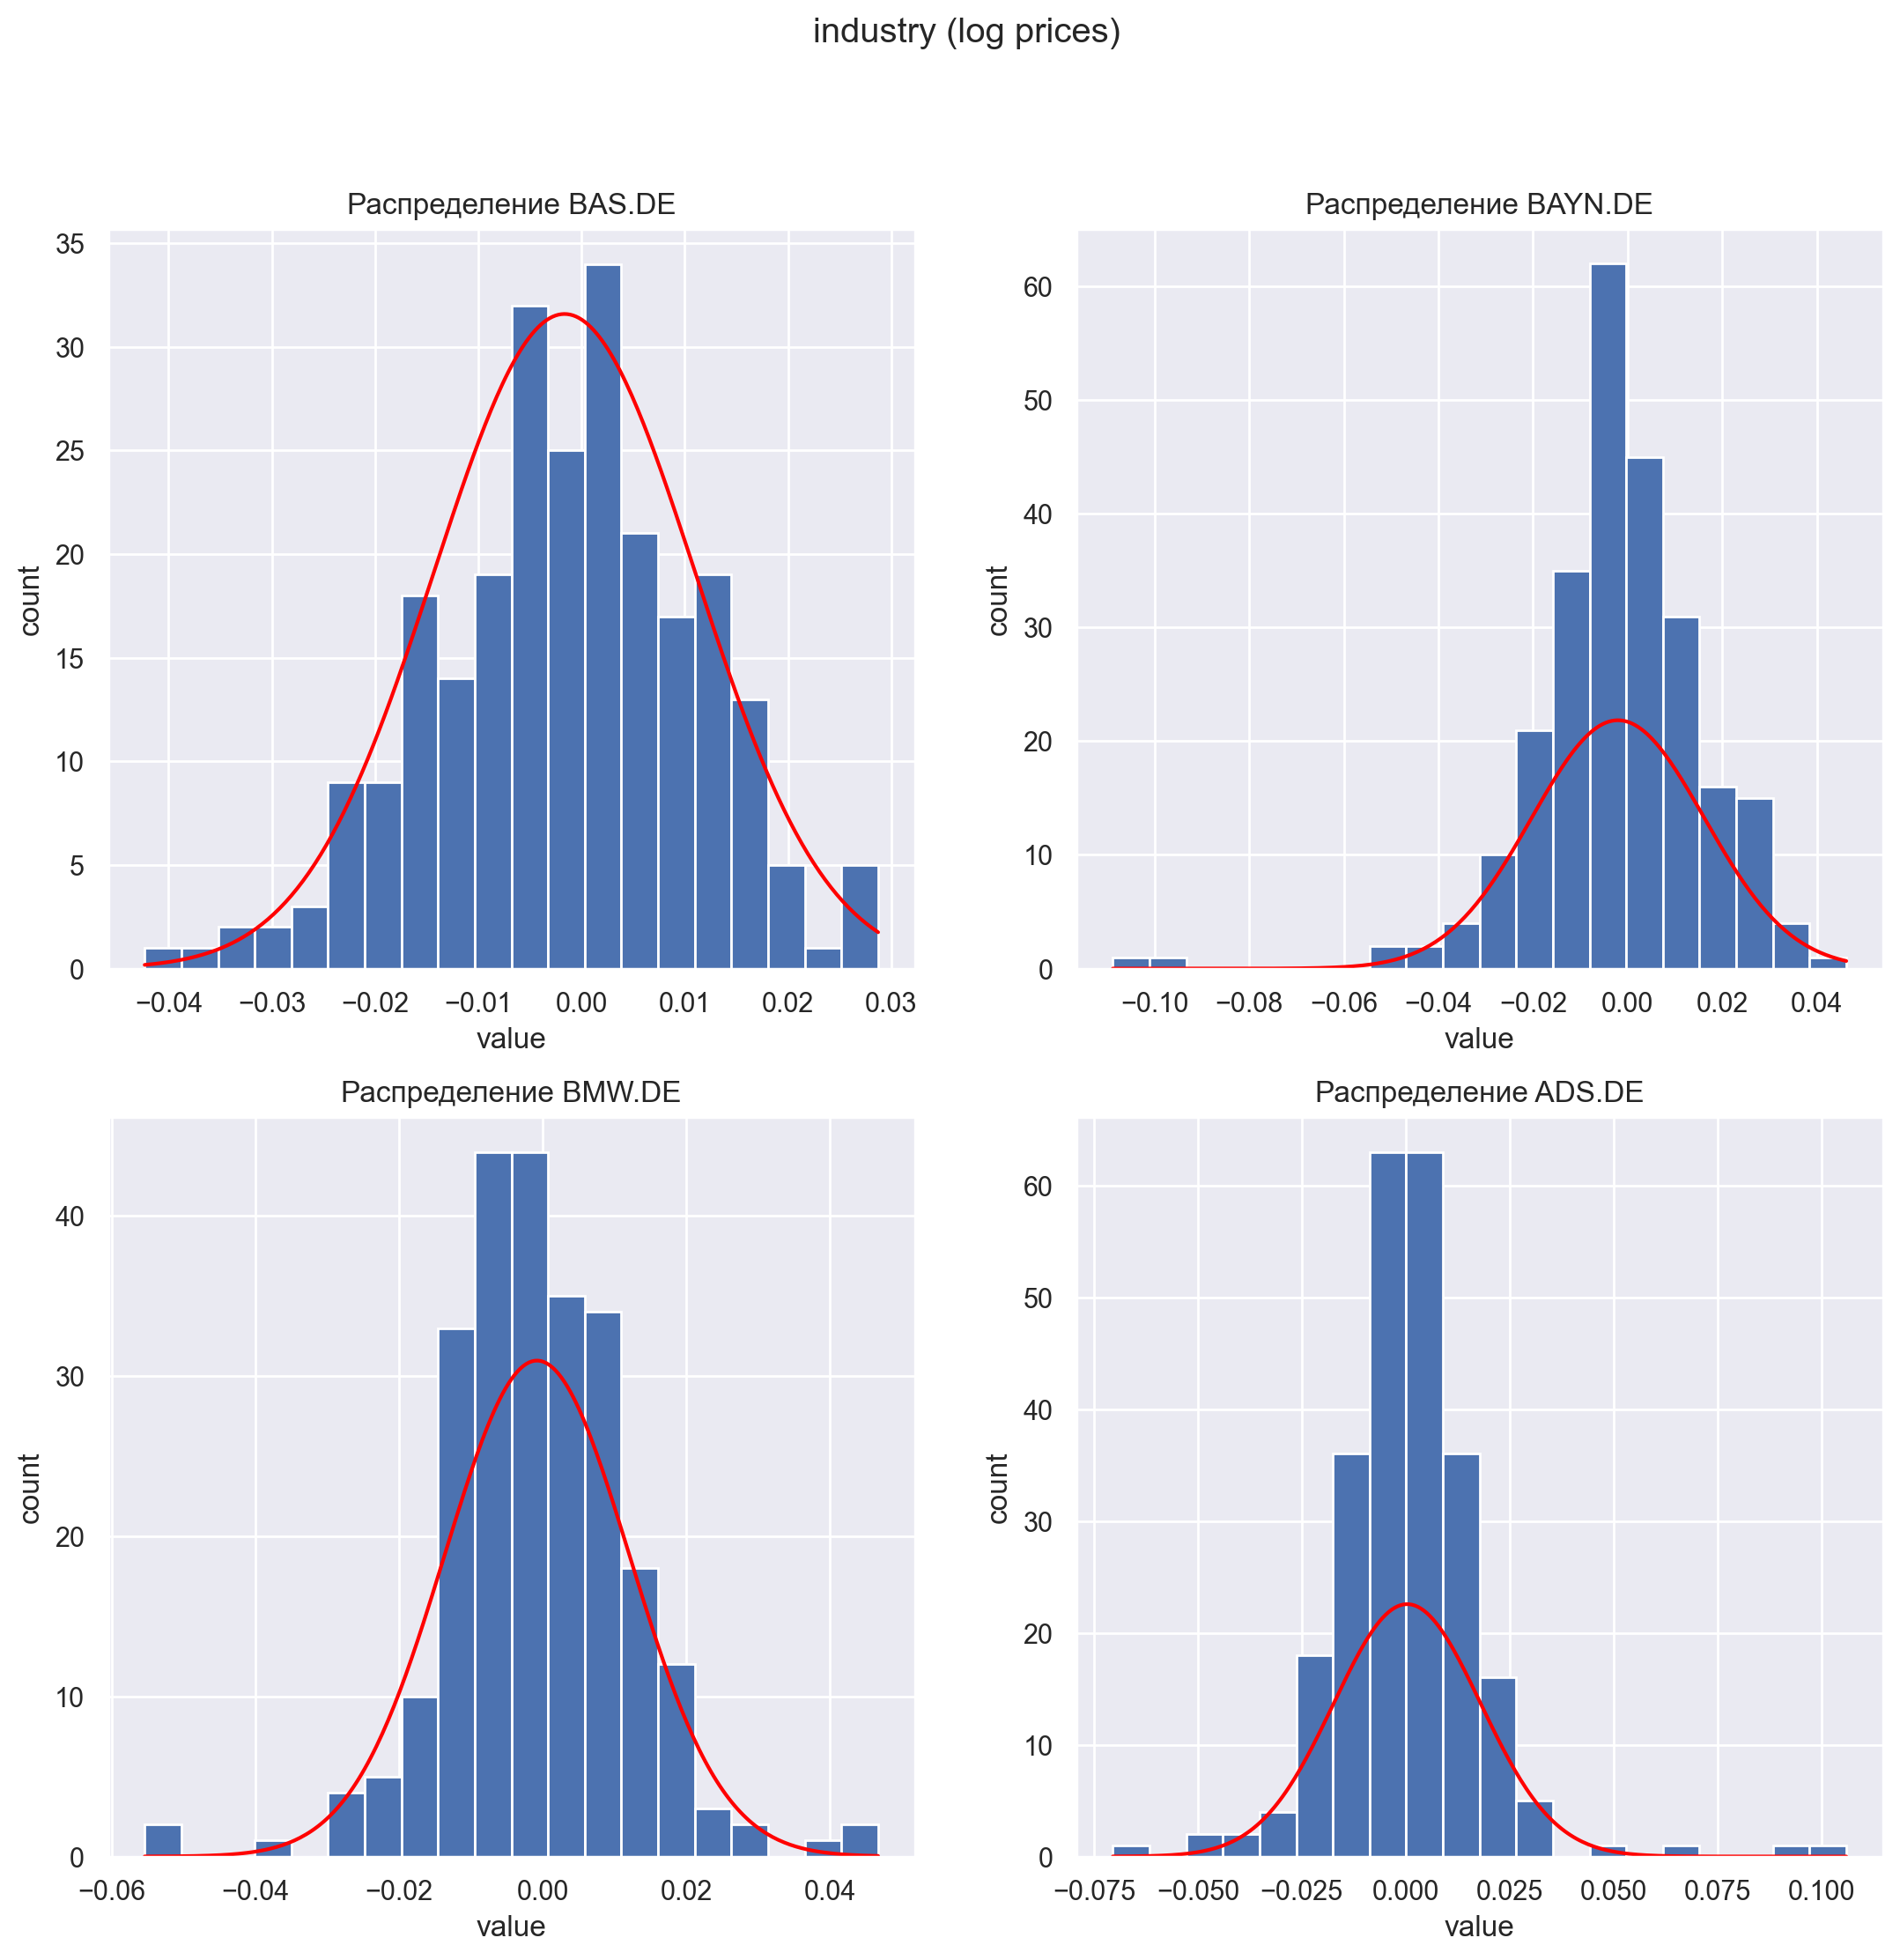

In [46]:
plt.rcParams['figure.figsize'] = 13, 12

for array, name in zip(all_stocks, names):
    plt.suptitle(f'{name} (log prices)')
    for s in range(len(array)):
        plt.subplot(2, 2, s + 1)
        returns[array[s]].hist(bins=20)
        plt.title(f'Распределение {array[s]}')
        plt.xlabel('value')
        plt.ylabel('count')
        
        x = np.linspace(returns[array[s]].min(), returns[array[s]].max(), 251)
        mu = returns[array[s]].mean()
        sigma = returns[array[s]].std()
        y = norm.pdf(x, mu, sigma)
        plt.plot(x, y, color='red')


    plt.show()

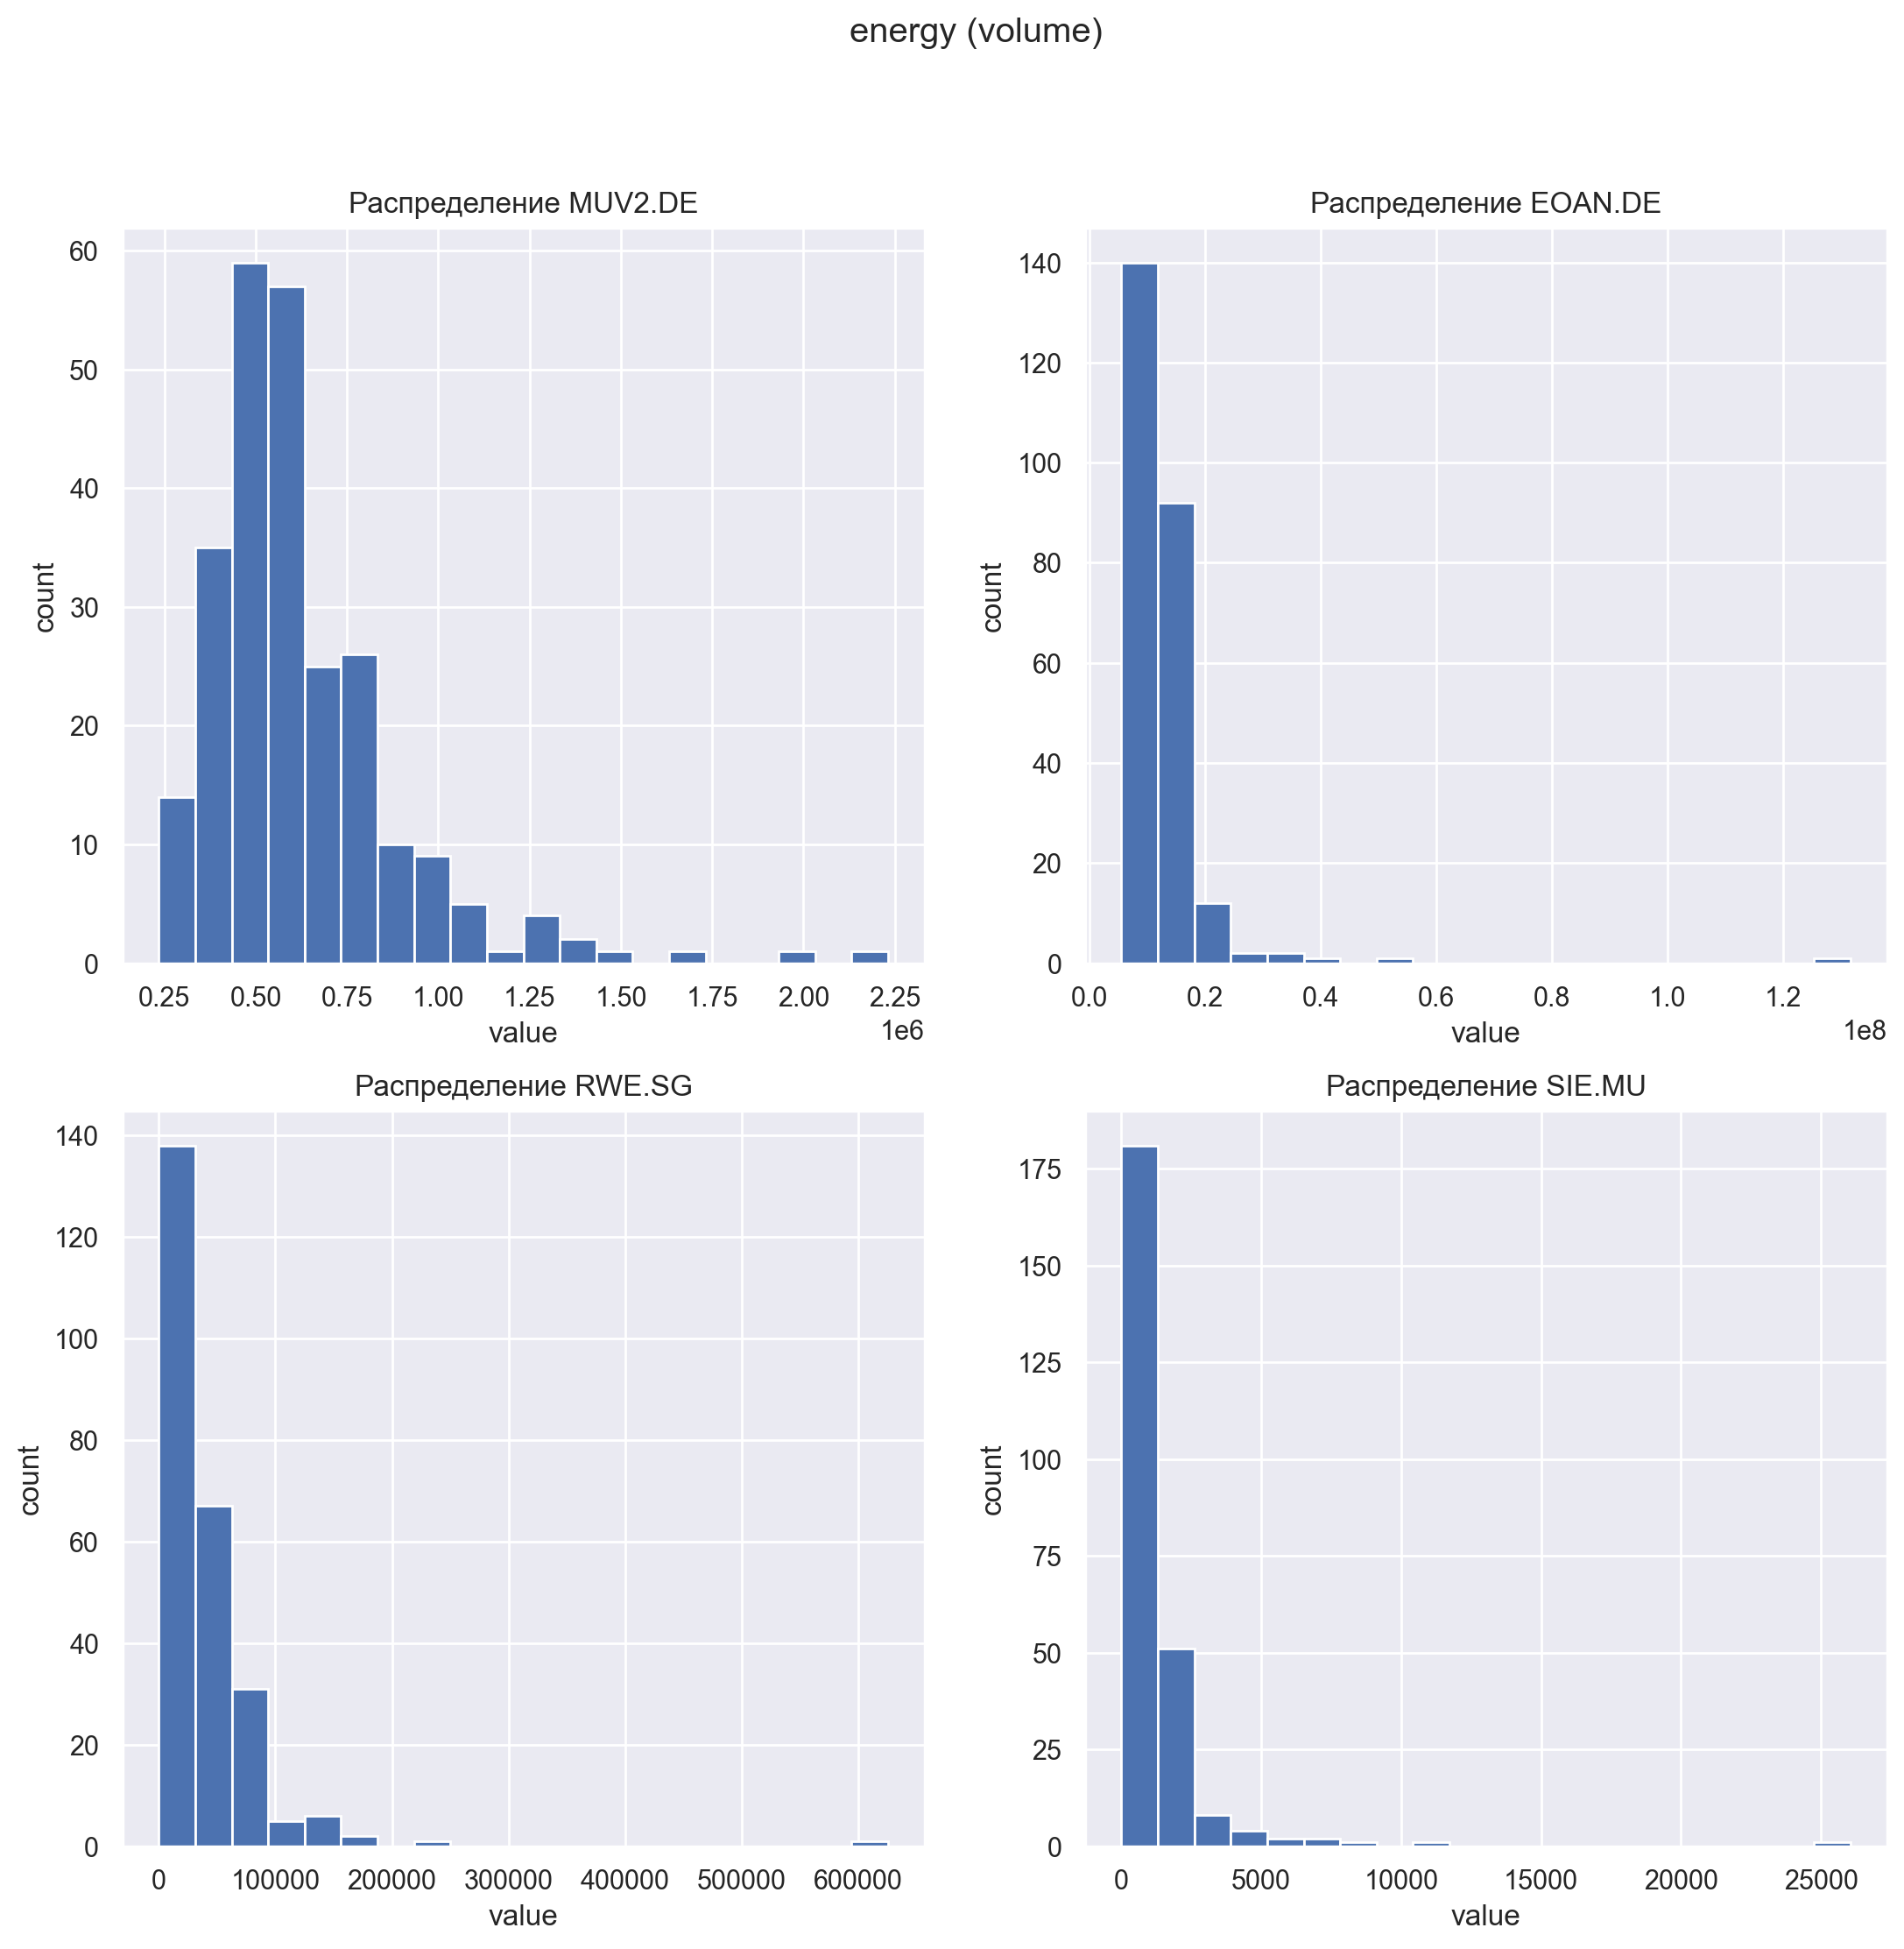

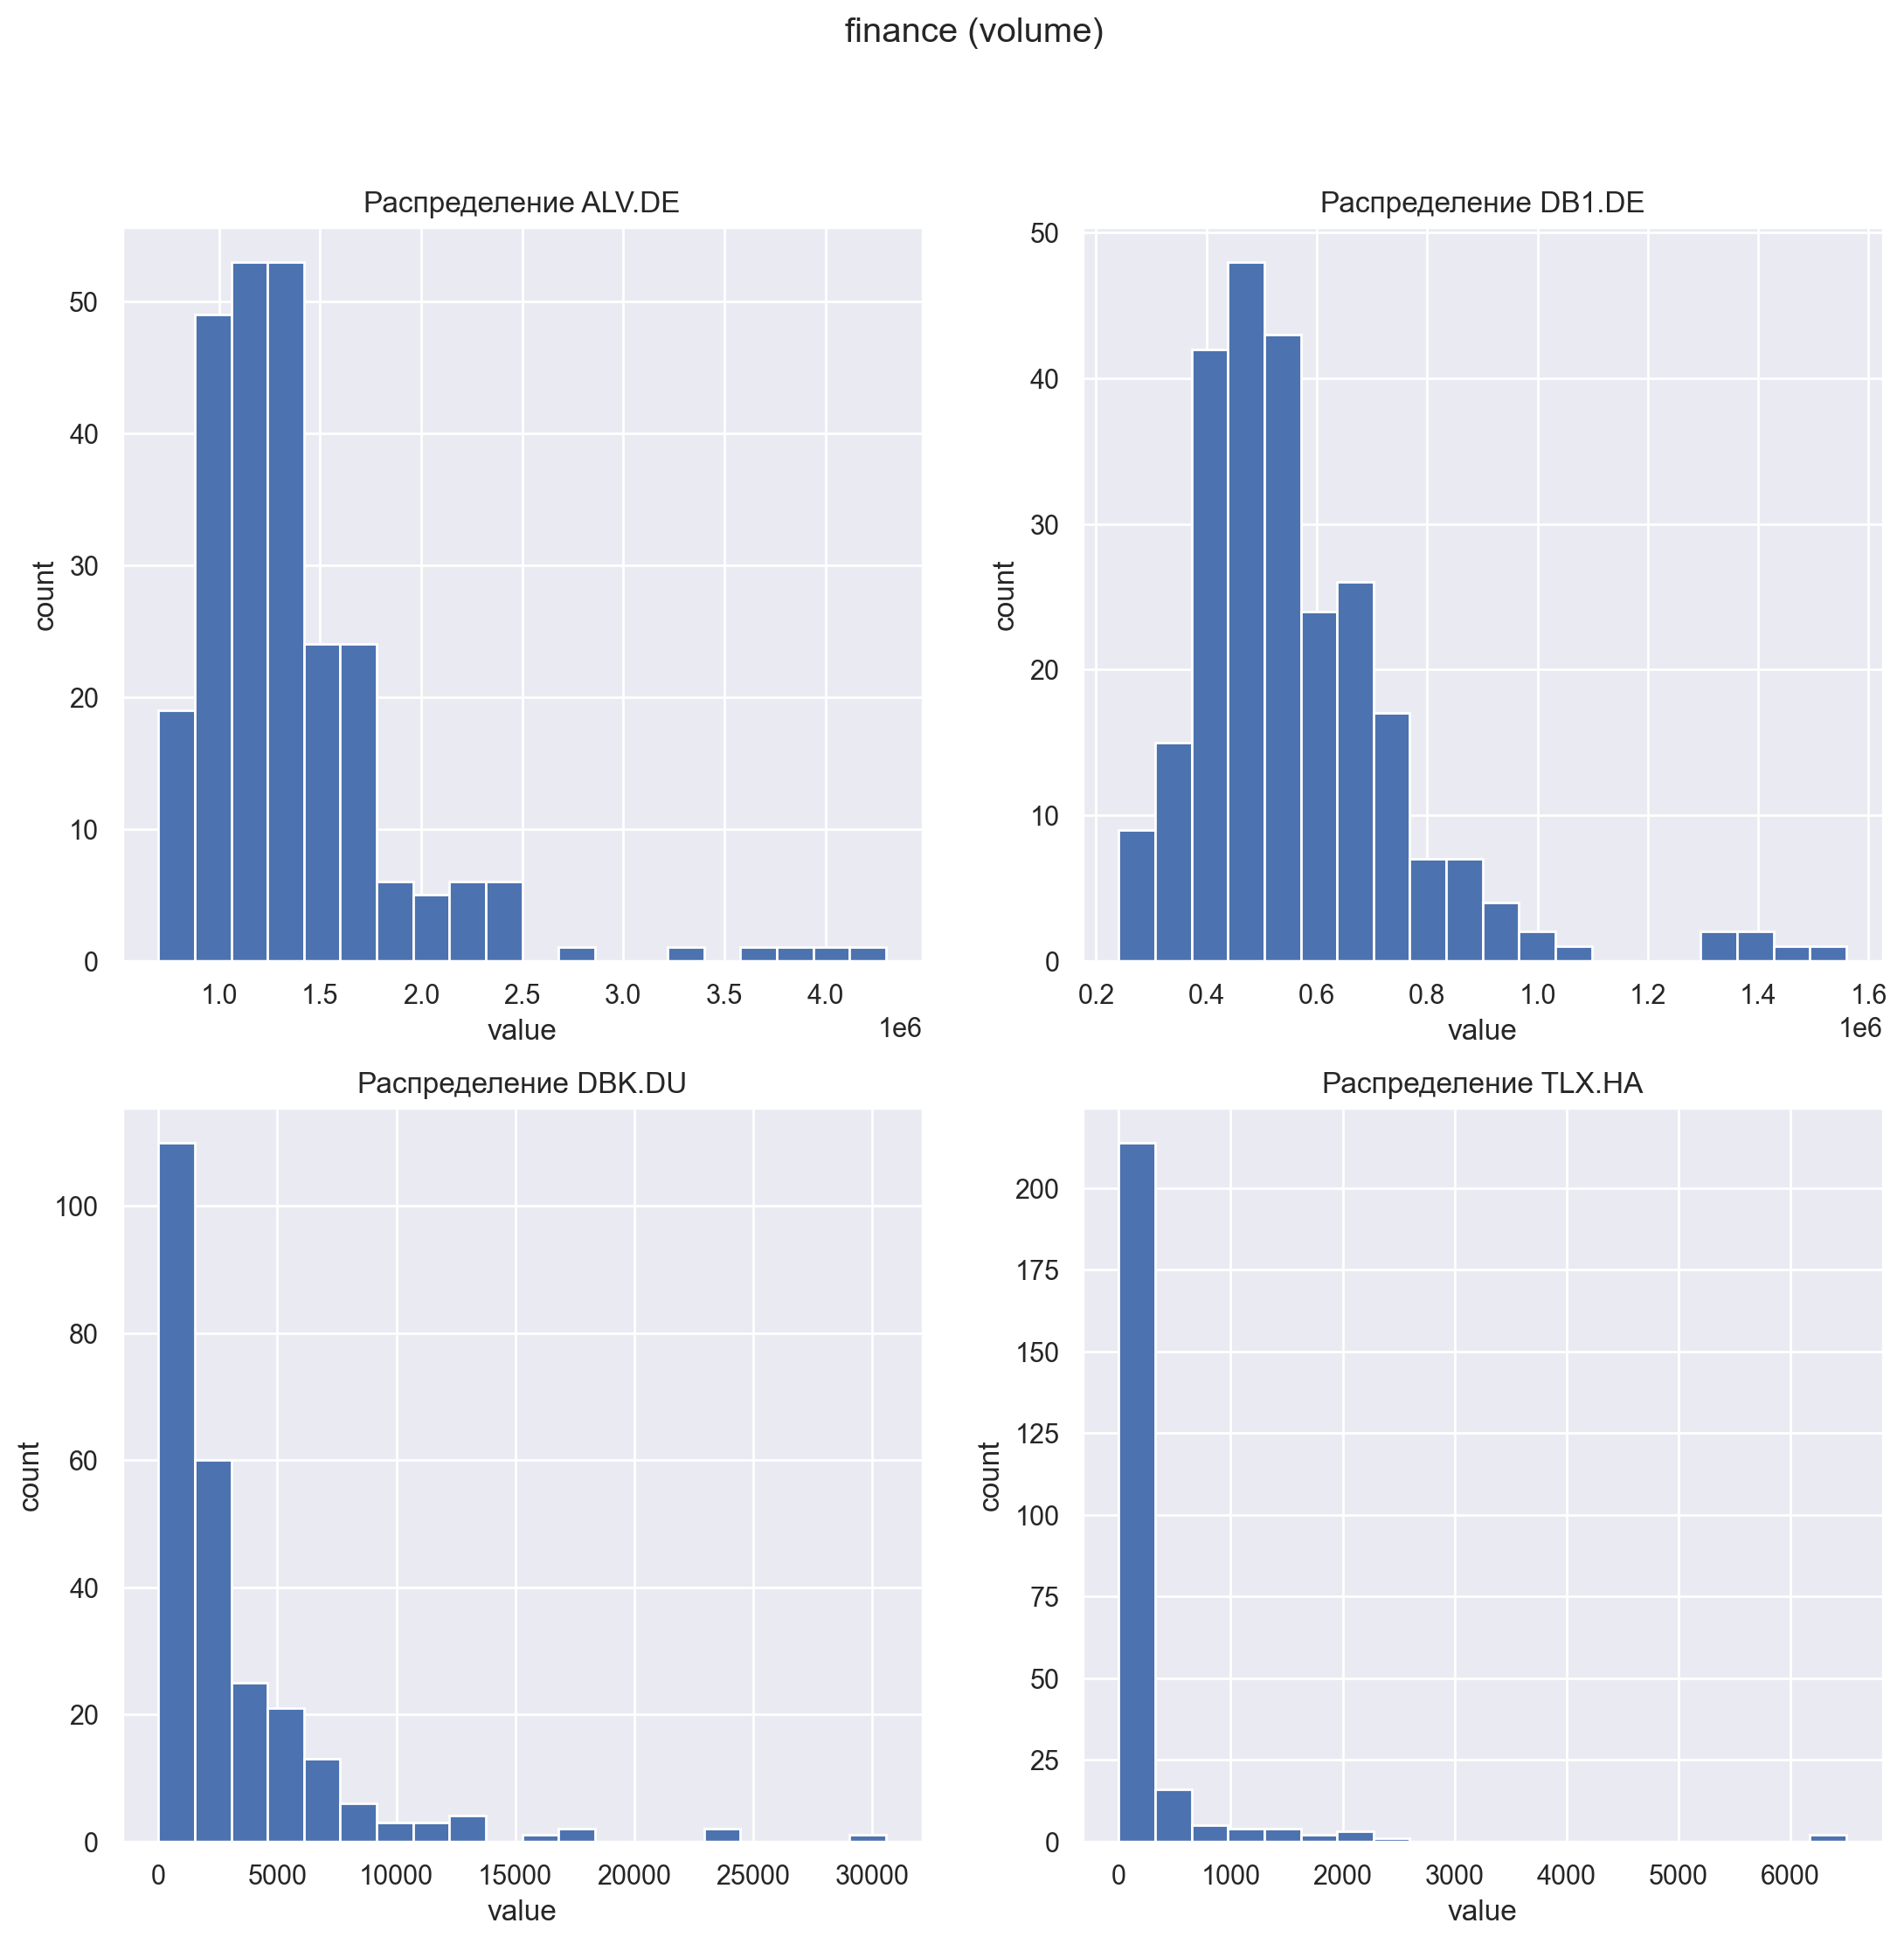

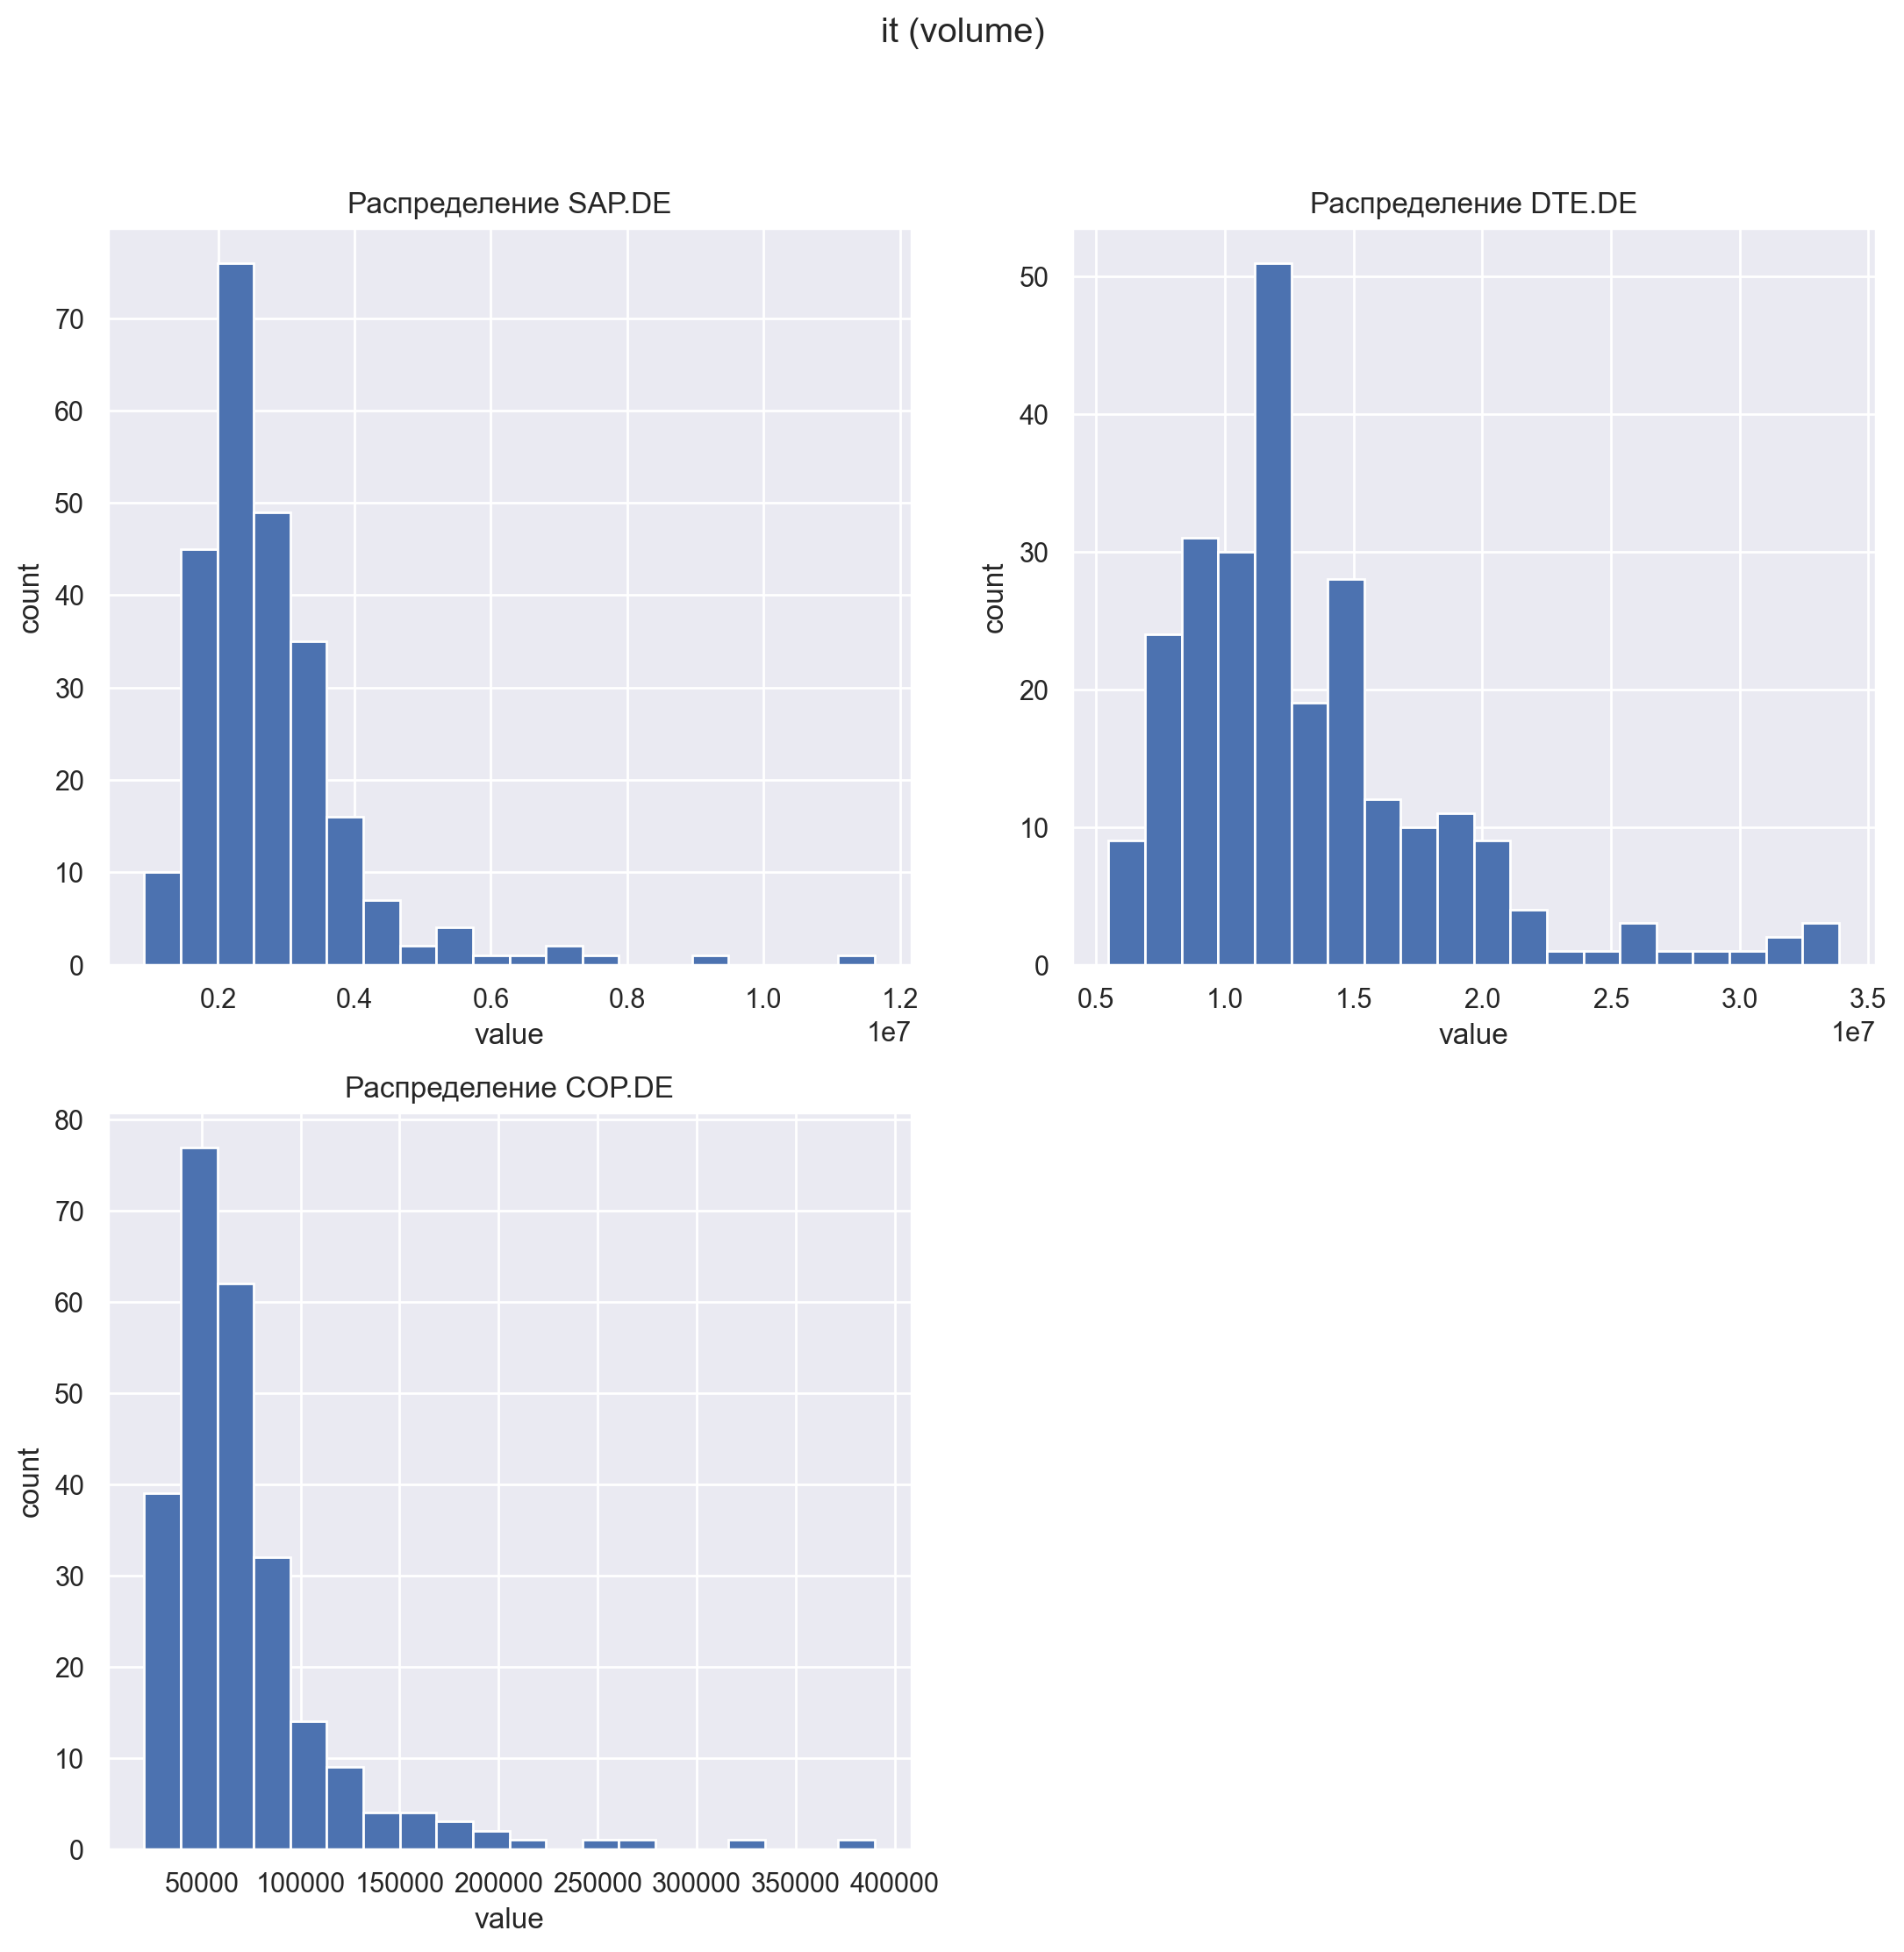

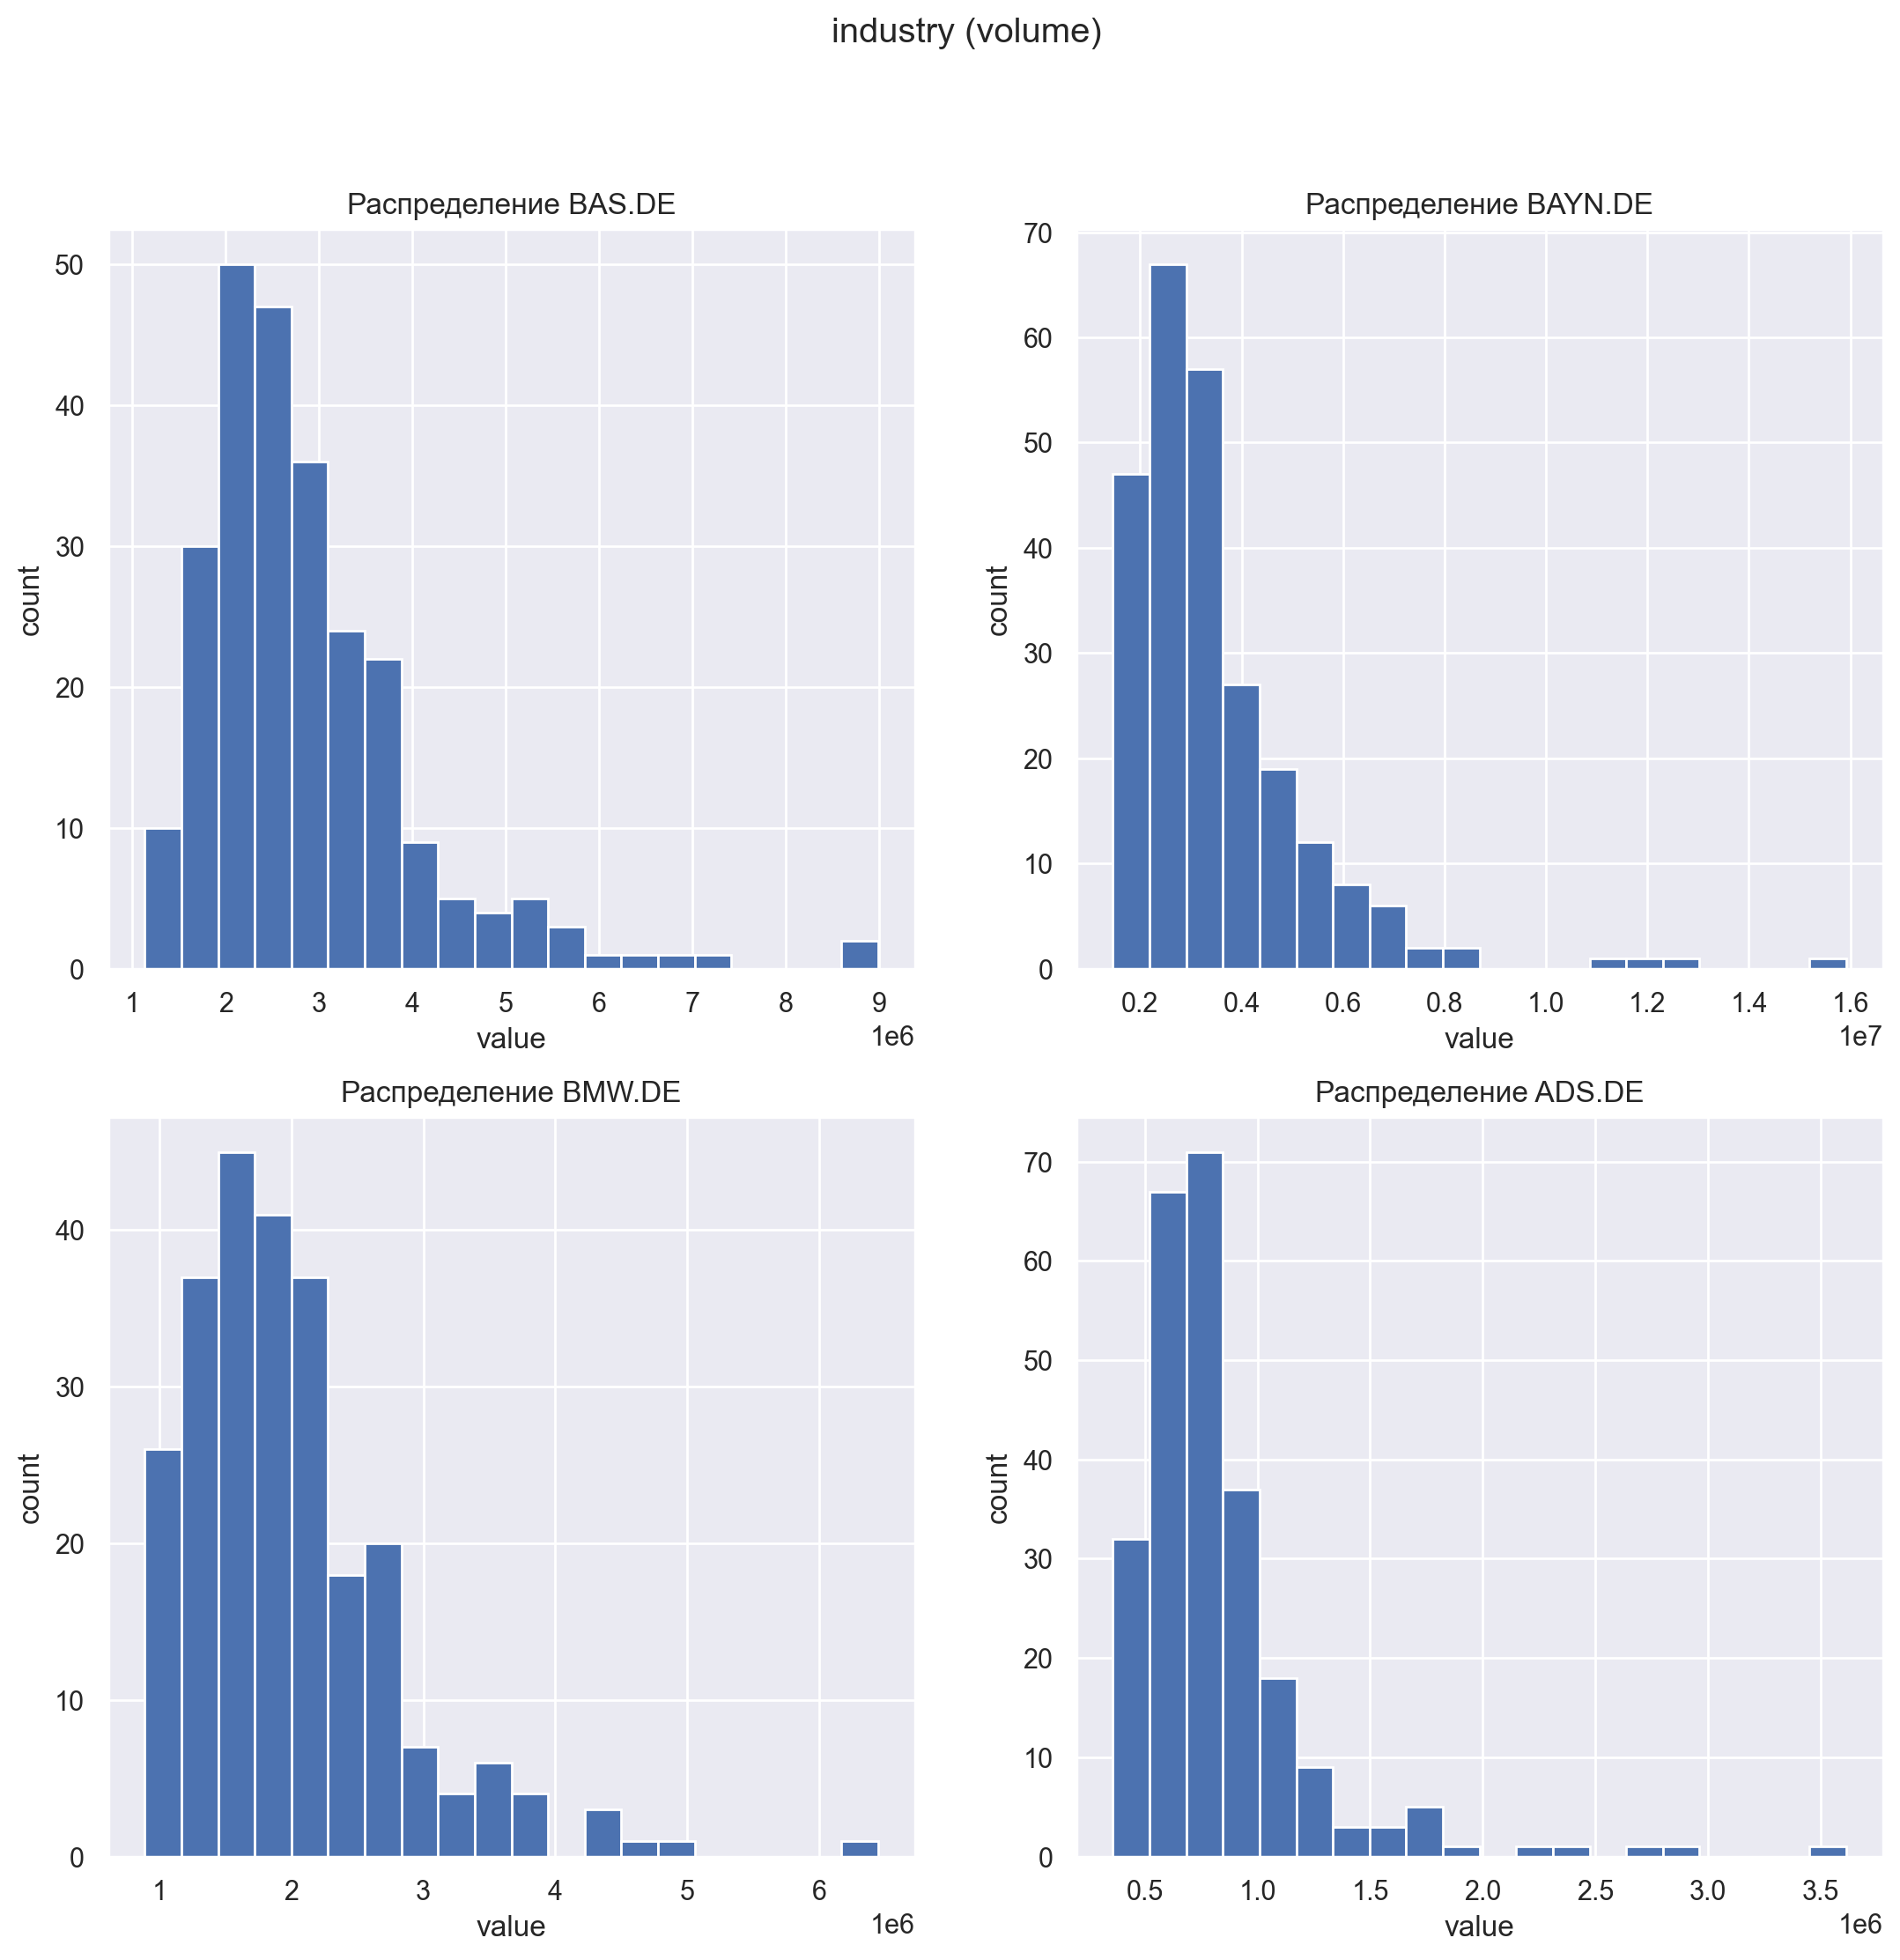

In [47]:
plt.rcParams['figure.figsize'] = 13, 12

for array, name in zip(all_stocks, names):
    plt.suptitle(f'{name} (volume)')
    for s in range(len(array)):
        plt.subplot(2, 2, s + 1)
        volume[array[s]].hist(bins=20)
        plt.title(f'Распределение {array[s]}')
        plt.xlabel('value')
        plt.ylabel('count')

    plt.show()

In [48]:
def return_results(p_value, alpha):
    if p_value > alpha:
        return 'Гипотеза не отвергается'

    return 'Гипотеза отвергается'

def return_ksteset(sample, alpha):
    p_value = kstest(sample, 'norm').pvalue
    
    return return_results(p_value, alpha)

def return_shapiro(sample, alpha):
    p_value = shapiro(sample).pvalue
    
    return return_results(p_value, alpha)

def return_normaltest(sample, alpha):
    p_value = normaltest(sample).pvalue
    
    return return_results(p_value, alpha)

def test_results(sample, alpha):
    return [return_ksteset(sample, alpha),
            return_shapiro(sample, alpha),
            return_normaltest(sample, alpha)]

In [49]:
log_res = pd.DataFrame(index=energy+finance+it+industry, columns=['Kolmogorov-Smirnov test',
                                                                  'Shapiro-Wilk test',
                                                                  'D’Agostino and Pearson’s test'])

for stock in log_res.index:
    res = test_results(returns[stock], alpha)
    log_res.loc[stock,] = res
    
log_res

,Kolmogorov-Smirnov test,Shapiro-Wilk test,D’Agostino and Pearson’s test
MUV2.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
EOAN.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
RWE.SG,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
SIE.MU,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
ALV.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
DB1.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
DBK.DU,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
TLX.HA,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
SAP.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
DTE.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается


In [50]:
volume_res = pd.DataFrame(index=energy+finance+it+industry, columns=['Kolmogorov-Smirnov test',
                                                                     'Shapiro-Wilk test',
                                                                     'D’Agostino and Pearson’s test'])

for stock in log_res.index:
    res = test_results(volume[stock], alpha)
    volume_res.loc[stock,] = res
    
volume_res

,Kolmogorov-Smirnov test,Shapiro-Wilk test,D’Agostino and Pearson’s test
MUV2.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
EOAN.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
RWE.SG,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
SIE.MU,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
ALV.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
DB1.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
DBK.DU,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
TLX.HA,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
SAP.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается
DTE.DE,Гипотеза отвергается,Гипотеза отвергается,Гипотеза отвергается


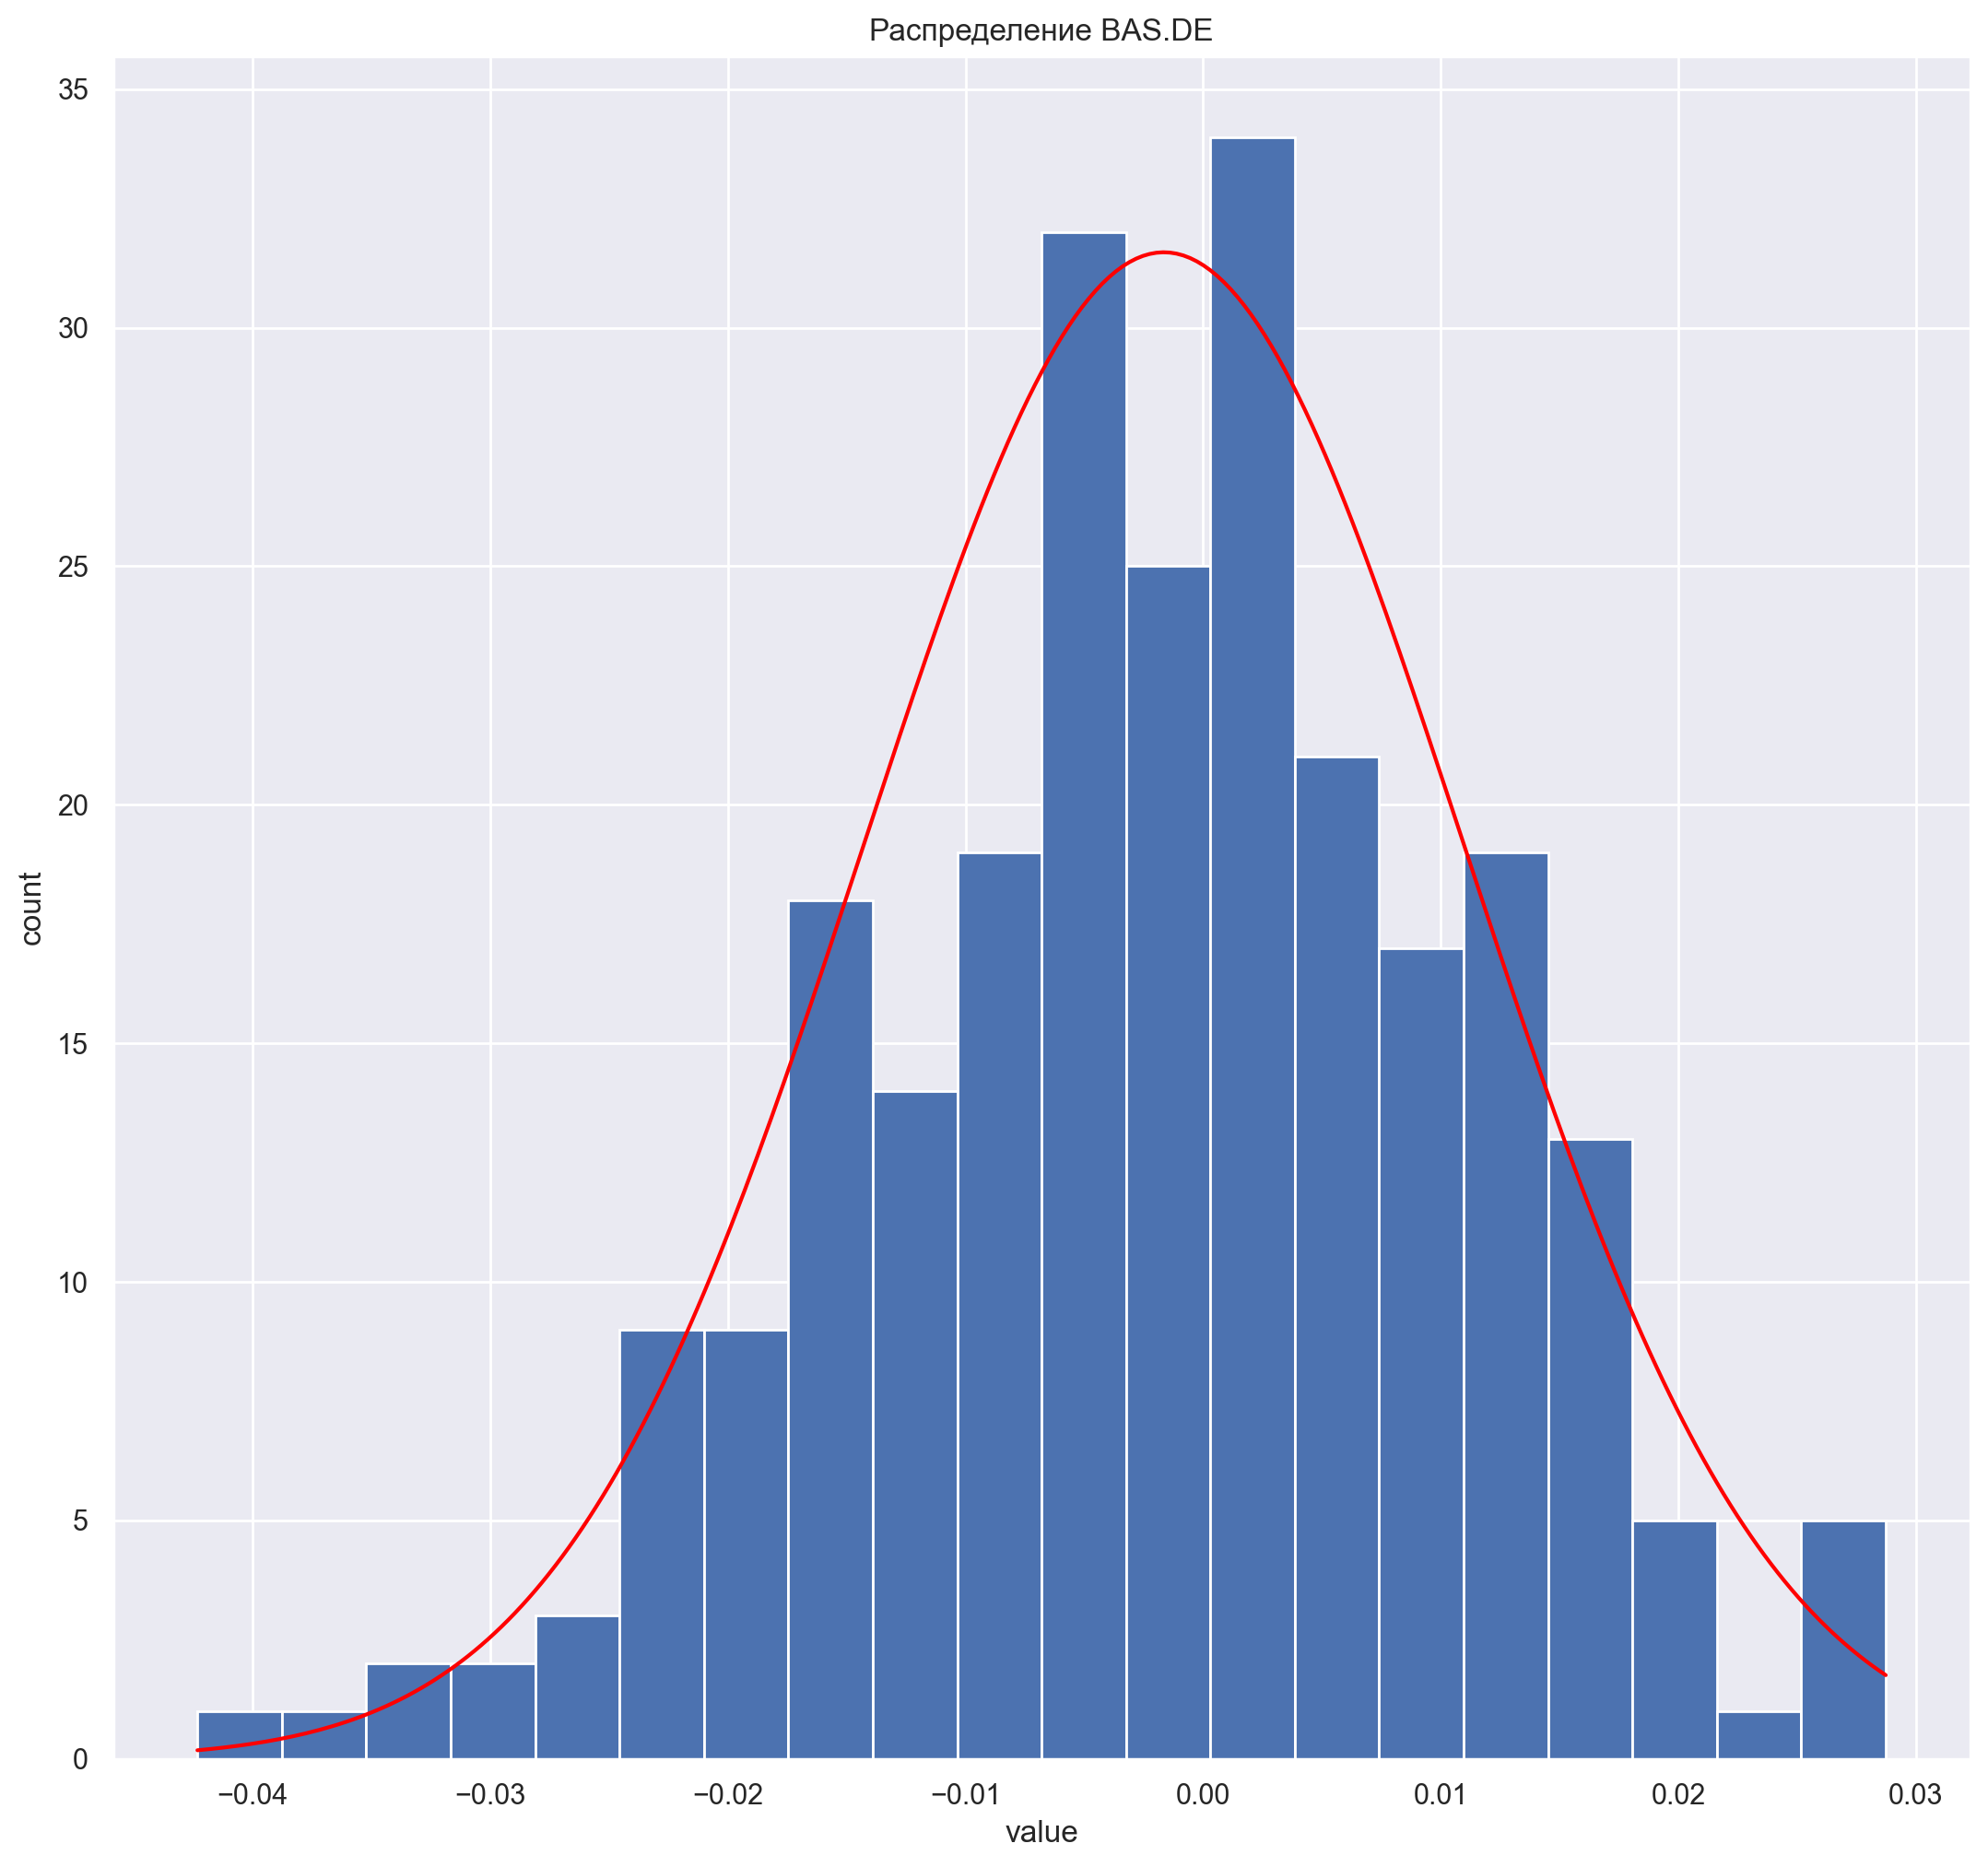

In [53]:
plt.rcParams['figure.figsize'] = 13, 12

returns['BAS.DE'].hist(bins=20)
plt.title(f'Распределение BAS.DE')
plt.xlabel('value')
plt.ylabel('count')

x = np.linspace(returns['BAS.DE'].min(), returns['BAS.DE'].max(), 251)
mu = returns['BAS.DE'].mean()
sigma = returns['BAS.DE'].std()
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, color='red')


plt.show()

In [67]:
lognorm_res = pd.DataFrame(index=energy+finance+it+industry, columns=['Kolmogorov-Smirnov test'])

for stock in stocks:
    lognorm_params = stats.lognorm.fit(volume[stock])
    kstest_statistic, kstest_pvalue = kstest(volume[stock], 'lognorm', lognorm_params)
    
    resul = None
    if kstest_pvalue < alpha:
        resul = "Гипотеза отвергается"
    else:
        resul = "Гипотеза не отвергается"
        
    lognorm_res.loc[stock,] = resul

lognorm_res

,Kolmogorov-Smirnov test
MUV2.DE,Гипотеза отвергается
EOAN.DE,Гипотеза отвергается
RWE.SG,Гипотеза отвергается
SIE.MU,Гипотеза не отвергается
ALV.DE,Гипотеза отвергается
DB1.DE,Гипотеза отвергается
DBK.DU,Гипотеза отвергается
TLX.HA,Гипотеза отвергается
SAP.DE,Гипотеза отвергается
DTE.DE,Гипотеза отвергается


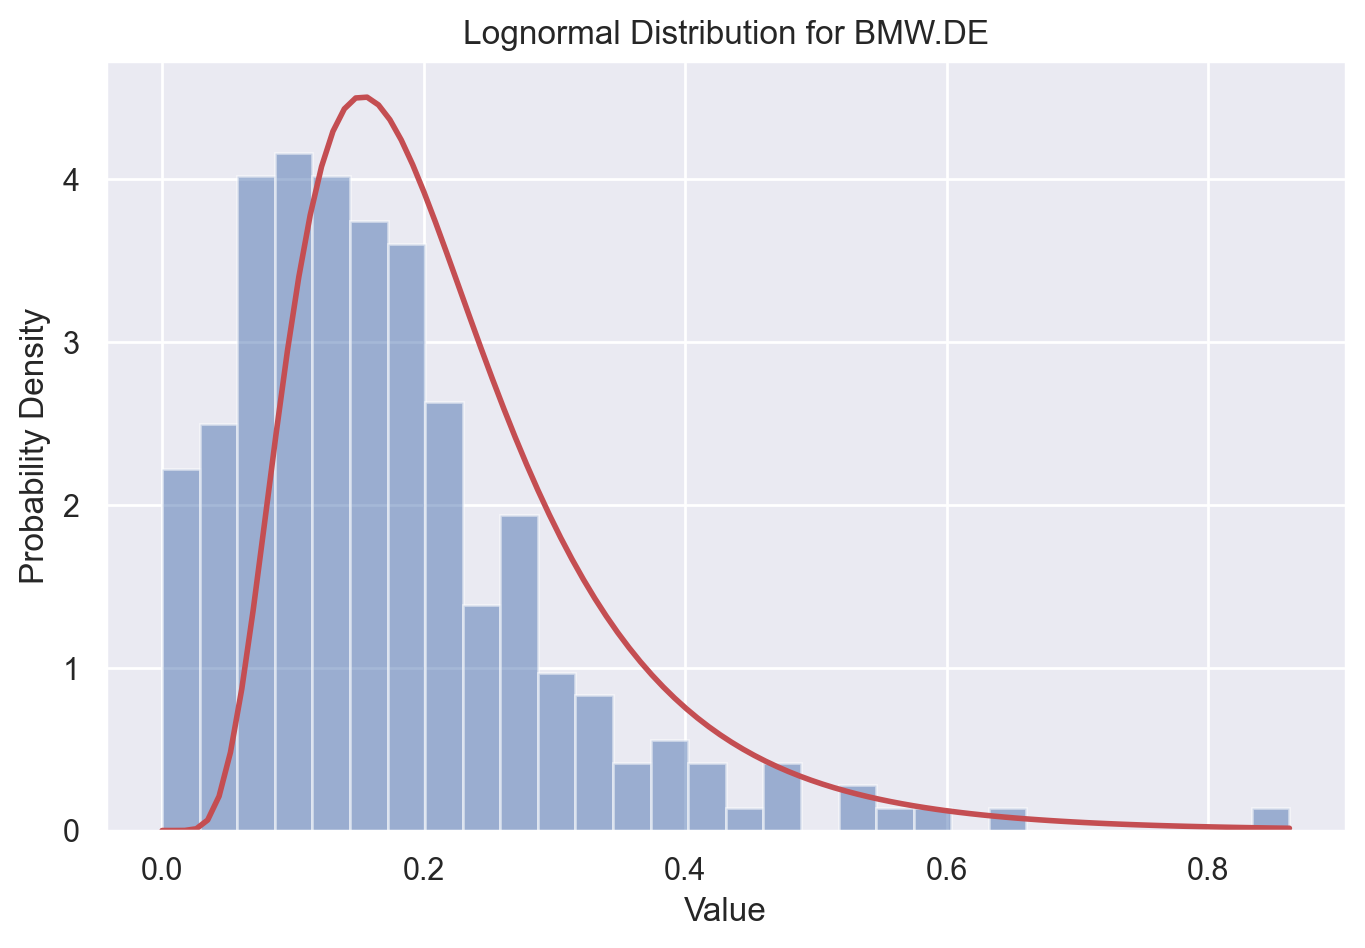

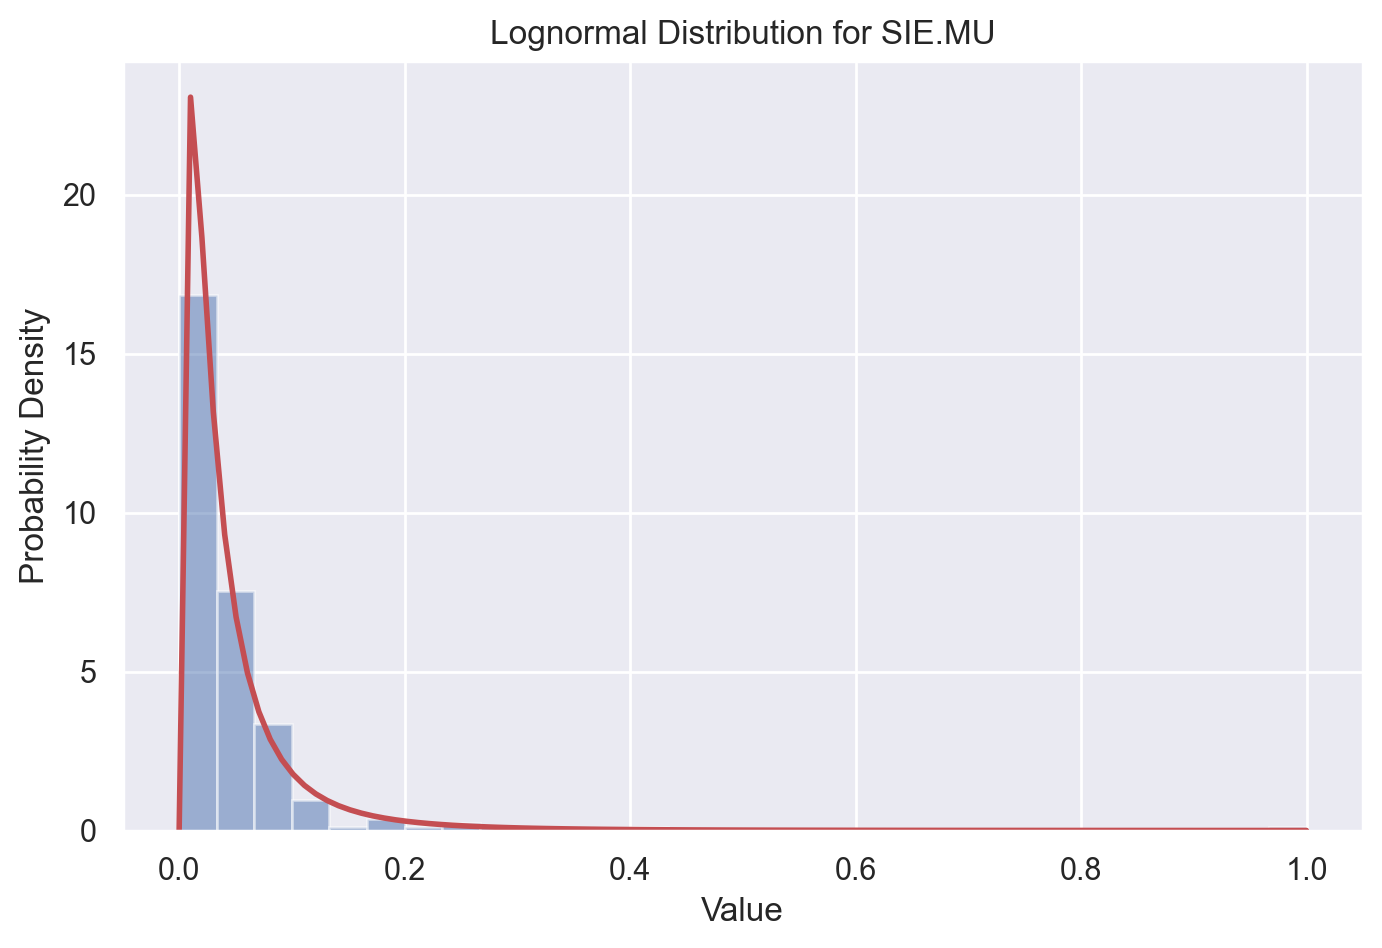

In [97]:
from scipy.stats import lognorm

plt.rcParams['figure.figsize'] = 8, 5

for stock in ['BMW.DE', 'SIE.MU']:
    data = (volume[stock] - volume[stock].min()) / volume[stock].max()

    plt.hist(data, bins=30, density=True, alpha=0.5, color='b')

    shape, loc, scale = lognorm.fit(data) 

    x = np.linspace(min(data), max(data), 100)
    pdf = lognorm.pdf(x, s=shape, scale=scale)
    plt.plot(x, pdf, 'r', linewidth=2)

    plt.title(f'Lognormal Distribution for {stock}')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')

    plt.show()
